# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Airawati Surjana
- Email: airawatisurjana@gmail.com
- ID Dicoding: airawati_surjana_mPjM

# Menentukan Pertanyaan Bisnis (Data tanggal : 01/01/2017 - 06/01/2018)

## Performa Olist
- Bagaimana GMV penjualan Olist setiap bulannya?

## Produk Olist
- Kategori produk apa yang paling banyak dan paling sedikit terjual di Olist?
- Kategori produk apa yang memiliki review  paling baik dan sebaliknya di Olist?

## Konsumen
- Bagaimana demografi konsumen yang dimiliki Olist?
- Kapan terakhir pelanggan melakukan transaksi di Olist?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir di Olist?
- Berapa banyak uang yang dihabiskan pelanggan di Olist?


## Penjual
- Bagaimana demografi penjual yang dimiliki Olist?
- Kapan terakhir seller mendapatkan transaksi di Olist?
- Bagaimana performa penjual dalam menyelesaikan pesanan di Olist?
- Berapa banyak uang yang di dapatkan penjual di Olist?

# Import Semua Packages/Library yang Digunakan

In [817]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas 
import contextily as ctx

# Data Wrangling

# Gathering Data

In [818]:
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [819]:
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [820]:
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [821]:
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [822]:
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [823]:
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [824]:
product_category_name_translation_df = pd.read_csv('data/product_category_name_translation.csv')
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [825]:
products_df = pd.read_csv('data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [826]:
sellers_df = pd.read_csv('data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


# Assessing Data

## Menilai tabel customers_df

In [827]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [828]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [829]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [830]:
customers_df.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

## Menilai tabel geolocation_df

In [831]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [832]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [833]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


## Menilai tabel order_items_df

In [834]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [835]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [836]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [837]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


## Menilai tabel order_reviews_df

In [838]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [839]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [840]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [841]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


## Menilai tabel order_payments_df

In [842]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [843]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [844]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [845]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


## Menilai tabel orders_df

In [846]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [847]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [848]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [849]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


## Menilai tabel product_category_name_translation_df

In [850]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [851]:
product_category_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [852]:
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())

Jumlah duplikasi:  0


In [853]:
product_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


## Menilai tabel products_df

In [854]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [855]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [856]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [857]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


## Menilai tabel sellers_df

In [858]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [859]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [860]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [861]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


# Insight Assessing Data
- Pada tabel **geolocation_df** terdapat duplikasi 261.831 yang perlu dibersihkan
- Pada tabel **order_items_df** nilai Freight_value sebesar 0 dapat mengindikasikan data yang hilang atau salah.
- Pada tabel **order_items_df** nilai harga maksimum 6735,00 dapat mengindikasikan data yang salah dan perlu diverifikasi.
- Pada tabel **order_items_df** shipping_limit_date berbentuk object yang seharusnya datetime.
- Pada tabel **order_reviews_df** review_creation_date dan review_answer_timestamp berbentuk object yang seharusnya datetime.
- Pada tabel **order_reviews_df** review_comment_title kosong 87656 dan review_comment_message kosong 58247, tetapi ada kemungkinan memang user tidak mengisi oleh karena itu kolom ini akan dibiarkan kosong.
- Pada tabel **order_payments_df** nilai payment value yang 0 dan maximum payment value 13,664.08 dapat mengindikasikan data yang hilang atau salah.
- Pada tabel **orders_df** order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date berbentuk object yang seharusnya datetime
- Pada tabel **orders_df** order_approved_at, order_delivered_carrier_date, order_delivered_customer terdapat missing values
- Pada table **products_df** product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g ,product_length_cm, product_height_cm, product_width_cm terdapat missing values

# Cleaning Data

## Membersihkan tabel geolocation_df duplikasi

In [862]:
geolocation_df.drop_duplicates(inplace=True)

In [863]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


## Membersihkan tabel order_items_df Freight value bernilai 0

In [864]:
min_freight_df = order_items_df[order_items_df['freight_value'] == order_items_df['freight_value'].min()]

# Mengecek barang yang freight nya bernilai 0 (ada kemungkinan karena barang digital maka tidak ada freight_value)
result_df = min_freight_df.merge(products_df, on='product_id', how='inner')
result_df = result_df.merge(product_category_name_translation_df, on='product_category_name', how='inner')

print(result_df[['product_id', 'price', 'freight_value', 'product_category_name', 'product_category_name_english']])

                           product_id  price  freight_value  \
0    53b36df67ebb7c41585e8d54d6772e08   99.9            0.0   
1    aca2eb7d00ea1a7b8ebd4e68314663af   69.9            0.0   
2    53b36df67ebb7c41585e8d54d6772e08   99.9            0.0   
3    422879e10f46682990de24d770e7f83d   53.9            0.0   
4    422879e10f46682990de24d770e7f83d   53.9            0.0   
..                                ...    ...            ...   
376  422879e10f46682990de24d770e7f83d   53.9            0.0   
377  7a10781637204d8d10485c71a6108a2e  219.0            0.0   
378  53b36df67ebb7c41585e8d54d6772e08  106.9            0.0   
379  f1c7f353075ce59d8a6f3cf58f419c9c  195.0            0.0   
380  53b36df67ebb7c41585e8d54d6772e08  112.9            0.0   

    product_category_name product_category_name_english  
0      relogios_presentes                 watches_gifts  
1        moveis_decoracao               furniture_decor  
2      relogios_presentes                 watches_gifts  
3      ferr

In [865]:
# Mengubah freight_value 0 menjadi median karena bukan barang digital
median_freight = order_items_df[order_items_df['freight_value'] > 0]['freight_value'].median()
order_items_df['freight_value'] = order_items_df['freight_value'].replace(0, median_freight)

In [866]:
# Verifikasi apakah berhasil mengubah freight value
print(order_items_df[order_items_df['freight_value'] == order_items_df['freight_value'].min()])

                                order_id  order_item_id  \
28981   41ef253cac66335bdb0b51fb4853f04e              1   
37231   547b3596c03dfad1b87305e9c5a554c2              3   
49446   7062eab93cccc51550b18e1787e7b8b1              1   
106668  f26d3cc4231c7230b8603f2beede9ea9              2   

                              product_id                         seller_id  \
28981   c4a6de6225217d4539c861c0b6316d86  7b07b3c7487f0ea825fc6df75abd658b   
37231   457cd0a99cfa977993e4eb6d98d95abb  ea8482cd71df3c1969d7b9473ff13abc   
49446   78f3f7fb2c7a8a53bccb6cfc49f34f66  e9779976487b77c6d4ac45f75ec7afe9   
106668  28857b241545853875bda6661ccdf0f7  2b2fed75b8e5ea3a052fc4c0825da485   

        shipping_limit_date   price  freight_value  
28981   2018-08-15 17:45:28   99.90           0.01  
37231   2018-04-26 23:30:52   39.99           0.01  
49446   2017-06-07 13:10:24   92.99           0.01  
106668  2017-07-07 19:55:12  113.00           0.01  


## Membersihkan tabel order_items_df harga maximum

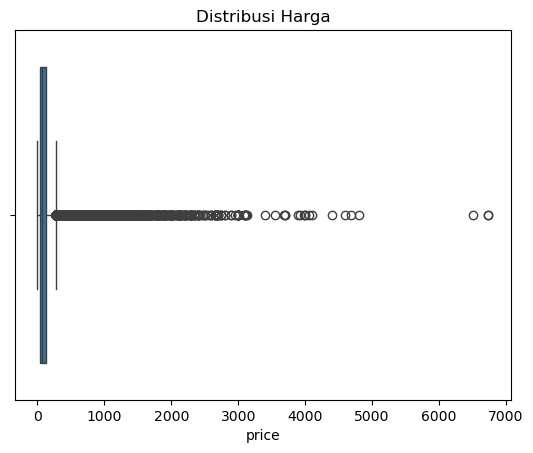

In [867]:
# mengecek harga apakah ada outlier 
sns.boxplot(x=order_items_df['price'])
plt.title("Distribusi Harga")
plt.show()

In [868]:
# Harga yang tidak wajar (>5000 karena melihat gambar diatas persebaran sudah sangat sedikit dan jauh)
high_price_df = order_items_df[order_items_df['price'] > 5000]
print(high_price_df)

                                order_id  order_item_id  \
3556    0812eb902a67711a1cb742b3cdaa65ae              1   
107841  f5136e38d1a14a4dbd87dff67da82701              1   
112233  fefacc66af859508bf1a7934eab1e97f              1   

                              product_id                         seller_id  \
3556    489ae2aa008f021502940f251d4cce7f  e3b4998c7a498169dc7bce44e6bb6277   
107841  1bdf5e6731585cf01aa8169c7028d6ad  ee27a8f15b1dded4d213a468ba4eb391   
112233  69c590f7ffc7bf8db97190b6cb6ed62e  80ceebb4ee9b31afb6c6a916a574a1e2   

        shipping_limit_date   price  freight_value  
3556    2017-02-16 20:37:36  6735.0         194.31  
107841  2017-06-15 02:45:17  6499.0         227.66  
112233  2018-08-02 04:05:13  6729.0         193.21  


In [869]:
# mengubah harga menjadi median 
median_price = order_items_df['price'].median()
order_items_df.loc[order_items_df['price'] > 5000, 'price'] = median_price

In [870]:
# verifikasi apakah berhasil mengubah data harga
print(order_items_df[order_items_df['price'] == order_items_df['price'].max()])

                               order_id  order_item_id  \
74336  a96610ab360d42a2e5335a3998b4718a              1   

                             product_id                         seller_id  \
74336  a6492cc69376c469ab6f61d8f44de961  59417c56835dd8e2e72f91f809cd4092   

       shipping_limit_date   price  freight_value  
74336  2017-04-18 13:25:18  4799.0         151.34  


## Membersihkan tabel order_items_df terkait shipping_limit_date  merupakan object bukan timestamp

In [871]:
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])

In [872]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


## Membersihkan tabel order_reviews_df terkait timestamp

In [873]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [874]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


## Membersihkan tabel order_payments_df dengan mengecek nilai payment value

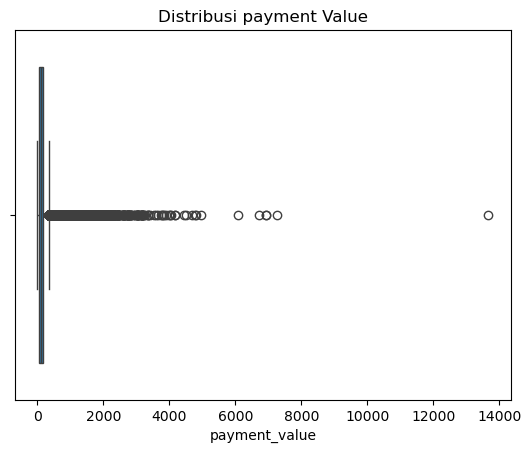

In [875]:
sns.boxplot(x=order_payments_df ['payment_value'])
plt.title("Distribusi payment Value")
plt.show()

In [876]:
# Mengecek data outlier yang memiliki payment value yang sangat besar dan 0 
high_and_zero_price_orders = order_payments_df[
    (order_payments_df['payment_value'] > 8000) | (order_payments_df['payment_value'] == 0)
]
high_and_zero_price_orders

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.00
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.00
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.00
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00


In [877]:
filtered_order_payments_df = order_payments_df[order_payments_df['order_id'].isin(high_and_zero_price_orders['order_id'])]
filtered_order_payments_df 

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02
5163,8bcbe01d44d147f901cd3192671144db,3,voucher,1,6.25
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16
11755,45ed6e85398a87c253db47c2d9f48216,2,voucher,1,50.01
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00
20963,8bcbe01d44d147f901cd3192671144db,1,credit_card,1,36.21
23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51


In [878]:
filtered_order_payments_df.groupby('order_id', as_index=False)['payment_value'].sum()

,order_id,payment_value
0,00b1cb0320190ca0daa2c88b35206009,0.00
1,03caa2c082116e1d31e67e9ae3700499,13664.08
2,45ed6e85398a87c253db47c2d9f48216,71.14
3,4637ca194b6387e2d538dc89b124b0ee,0.00
4,6ccb433e00daae1283ccc956189c82ae,122.04
5,8bcbe01d44d147f901cd3192671144db,74.16
6,b23878b3e8eb4d25a158f57d96331b18,171.57
7,c8c528189310eaa44a745b8d9d26908b,0.00
8,fa65dad1b0e818e3ccc5cb0e39231352,457.99


In [879]:
# Mengecek order_status pada tabel orders untuk data outlier
filtered_orders = orders_df[orders_df['order_id'].isin(high_and_zero_price_orders['order_id'])]
filtered_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
423,45ed6e85398a87c253db47c2d9f48216,8eab8f9b3c744b76b65f7a2c0c8f2d6c,delivered,2017-06-08 21:18:45,2017-06-08 21:30:18,2017-06-09 08:35:18,2017-06-22 17:44:53,2017-07-10 00:00:00
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
13390,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00
25932,fa65dad1b0e818e3ccc5cb0e39231352,9af2372a1e49340278e7c1ef8d749f34,shipped,2017-04-20 12:45:34,2017-04-22 09:10:13,2017-04-24 11:31:17,NaN,2017-05-18 00:00:00
32287,6ccb433e00daae1283ccc956189c82ae,843b211abe7b0264dd4a69eafc5bdf43,delivered,2017-10-26 23:51:35,2017-10-27 00:46:58,2017-10-27 19:53:03,2017-11-08 18:47:00,2017-11-22 00:00:00
39919,4637ca194b6387e2d538dc89b124b0ee,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,NaN,NaN,NaN,2018-09-10 00:00:00
40235,c8c528189310eaa44a745b8d9d26908b,197a2a6a77da93f678ea0d379f21da0a,canceled,2018-08-28 20:05:14,NaN,NaN,NaN,2018-09-11 00:00:00
85786,b23878b3e8eb4d25a158f57d96331b18,648121b599d98c420ef93f6135f8c80c,delivered,2017-05-27 19:20:24,2017-05-27 19:35:17,2017-05-29 04:49:37,2017-06-07 08:53:10,2017-06-29 00:00:00
96970,8bcbe01d44d147f901cd3192671144db,f2def7f64f36952f2f5a9791f0285f34,delivered,2018-01-24 23:24:14,2018-01-24 23:37:20,2018-01-30 22:43:30,2018-02-02 21:26:42,2018-02-21 00:00:00


### Insight
- Setelah di grup order_id yang payment_value= 0 hanya 3 order_id dan ketiga order_id ini memiliki not defined payment method. Setelah di cek order_status canceled sehingga merupakan hal yang wajar untuk 3 order_id ini bernilai 0
- Outlier terjadi untuk order_id 03caa2c082116e1d31e67e9ae3700499 dan order status delivered karena nilai nya yang sangat besar sehingga perlu di cek lebih dalam

In [880]:
# Mengecek order_status pada tabel order_items untuk data outlier
filtered_order_items = order_items_df[order_items_df['order_id'].isin(high_and_zero_price_orders['order_id'])]
filtered_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
1647,03caa2c082116e1d31e67e9ae3700499,1,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.00,28.01
1648,03caa2c082116e1d31e67e9ae3700499,2,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.00,28.01
1649,03caa2c082116e1d31e67e9ae3700499,3,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.00,28.01
1650,03caa2c082116e1d31e67e9ae3700499,4,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.00,28.01
1651,03caa2c082116e1d31e67e9ae3700499,5,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.00,28.01
1652,03caa2c082116e1d31e67e9ae3700499,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.00,28.01
1653,03caa2c082116e1d31e67e9ae3700499,7,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.00,28.01
1654,03caa2c082116e1d31e67e9ae3700499,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.00,28.01
30803,45ed6e85398a87c253db47c2d9f48216,1,75d6b6963340c6063f7f4cfcccfe6a30,cc419e0650a3c5ba77189a1882b7556a,2017-06-15 21:30:18,56.99,14.15
47880,6ccb433e00daae1283ccc956189c82ae,1,2ee4be9805f228255a38a6f9b03fff1a,da20530872245d6cd9d2f5725613c430,2017-11-03 00:46:58,94.00,28.04


### Insight
- Outlier untuk order_id 03caa2c082116e1d31e67e9ae3700499 perlu divalidasi ke customer yang membeli apakah benar membeli 8 buah produk tersebut. Untuk proyek ini diasumsikan bahwa benar dari konsumen membeli 8 produk sehingga tidak akan diubah

## Pada tabel **orders_df** order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date berbentuk object yang seharusnya datetime

In [881]:
datetime_columns = ["order_purchase_timestamp" , "order_approved_at", "order_delivered_carrier_date" , "order_delivered_customer_date" , "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [882]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## Pada tabel **orders_df** order_approved_at, order_delivered_carrier_date, order_delivered_customer terdapat missing values

In [883]:
# Mengecek null values pada order_status = delivered
filtered_rows_delivered = orders_df[(orders_df.isnull().any(axis=1)) & (orders_df['order_status'] == 'delivered')]
filtered_rows_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22


In [884]:
# Mengubah Null values pada kolom order_approved_at untuk order_status deliverer 
# Step 1: Filter `order_status == 'delivered'` dan hitung median perbedaan waktu 
delivered_df = orders_df[orders_df['order_status'] == 'delivered']
time_diff = (delivered_df['order_approved_at'] - delivered_df['order_purchase_timestamp']).dropna()
median_time_diff = time_diff.median()
print(median_time_diff)

# Step 2: update untuk yang berstatus `delivered` dan `order_approved_at` bernilai null 
orders_df.loc[
    (orders_df['order_status'] == 'delivered') & (orders_df['order_approved_at'].isnull()),
    'order_approved_at'
] = orders_df['order_purchase_timestamp'] + median_time_diff

# Mengubah Null values pada kolom order_delivered_carrier_date untuk order_status deliverer 
# Step 1: Filter `order_status == 'delivered'` dan hitung median perbedaan waktu 
delivered_df = orders_df[orders_df['order_status'] == 'delivered']
time_diff = (delivered_df['order_delivered_carrier_date'] - delivered_df['order_approved_at']).dropna()
median_time_diff = time_diff.median()
print(median_time_diff)

# Step 2: update untuk yang berstatus `delivered` dan `order_delivered_carrier_date` bernilai null
orders_df.loc[
    (orders_df['order_status'] == 'delivered') & (orders_df['order_delivered_carrier_date'].isnull()),
    'order_delivered_carrier_date'
] = orders_df['order_approved_at'] + median_time_diff


# Mengubah Null values pada kolom order_delivered_customer_date untuk order_status deliverer 
# Step 1: Filter `order_status == 'delivered'` dan hitung median perbedaan waktu 
delivered_df = orders_df[orders_df['order_status'] == 'delivered']
time_diff = (delivered_df['order_delivered_customer_date'] - delivered_df['order_delivered_carrier_date']).dropna()
median_time_diff = time_diff.median()
print(median_time_diff)

# Step 2: update untuk yang berstatus `delivered` dan  `order_delivered_customer_date bernilai null 	`
orders_df.loc[
    (orders_df['order_status'] == 'delivered') & (orders_df['order_delivered_customer_date'].isnull()),
    'order_delivered_customer_date'
] = orders_df['order_delivered_carrier_date'] + median_time_diff


# Check null values pada order_status = delivered
filtered_rows_delivered = orders_df[(orders_df.isnull().any(axis=1)) & (orders_df['order_status'] == 'delivered')]
filtered_rows_delivered

0 days 00:20:36
1 days 19:35:38
7 days 02:23:40


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [885]:
filtered_rows = orders_df[(orders_df.isnull().any(axis=1)) & (orders_df['order_status'] == 'shipped')]
filtered_rows

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,2017-06-08
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaT,2017-12-13
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaT,2018-08-03
...,...,...,...,...,...,...,...,...
98534,a59ef0abffbef8ddaae23600b6ee6604,49e64271fb8eeb19851dc7e850e92204,shipped,2017-11-06 17:35:49,2017-11-07 06:31:44,2017-11-07 18:57:39,NaT,2017-11-24
98779,dab8a6c6bd6ec448df5b3a6b6cb887bc,394653a10cab83cad40d7e2713f3ab89,shipped,2018-07-14 10:12:51,2018-07-16 12:30:58,2018-07-16 14:34:00,NaT,2018-08-03
98932,492aed3c33bac22a8e04138319829283,58466c1166c377a56f6b2ae0d93ffbc0,shipped,2018-07-06 16:26:47,2018-07-06 16:35:10,2018-07-10 12:27:00,NaT,2018-07-26
99113,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaT,2018-07-24


In [886]:
filtered_rows = orders_df[(orders_df.isnull().any(axis=1)) & (orders_df['order_status'] == 'invoiced') & 
    (orders_df['order_approved_at'].isnull())]
filtered_rows

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


### Insight
- Untuk tabel orders_df dicek berdasarkan status, dimana untuk status delivered semua null value pada order_approved_at, order_delivered_carrier_date, order_delivered_customer diganti dengan median hari yang dibutuhkan
- Untuk tabel orders_df untuk status shipped, invoiced, cancelled, dan lain-lain sangat mungkin terdapat null value karena belum terdelivered

## Pada table **products_df** product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g ,product_length_cm, product_height_cm, product_width_cm terdapat missing values

In [887]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [888]:
filtered_rows_products = products_df[products_df.isnull().any(axis=1)]
filtered_rows_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [889]:
filtered_rows_products['is_in_order_items'] = filtered_rows_products['product_id'].isin(order_items_df['product_id'])
referenced_products = filtered_rows_products[filtered_rows_products['is_in_order_items']]
referenced_products

/var/folders/51/8693d2mn1xv_9fhrdwmmn6x00000gn/T/ipykernel_1982/1948174889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rows_products['is_in_order_items'] = filtered_rows_products['product_id'].isin(order_items_df['product_id'])


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,is_in_order_items
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0,True
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0,True
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0,True
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0,True
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0,True
...,...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0,True
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0,True
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0,True
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0,True


### Insight
- untuk saat ini null value pada products_df tidak bisa di delete karena ketika di cek terdapat juga pada table order_items. Dibutuhkan pengecekan secara manual untuk mengetahui nama product jika dibutuhkan dan jika memang product tersebut signifikan dalam mendapatkan insight tambahan

# Exploratory Data Analysis (EDA)

## Explore customers_df

In [890]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
46701,c701fbfa77791abd05eef9eacf7ea7a8,0818c7d2f55154e1398f23ce0c1eed79,9370,maua,SP
8478,99174f8fd08e1daf113666a2ad3383d7,248c08a4db07e08b2ebca9196b69570b,21031,rio de janeiro,RJ
94696,05e996469a2bf9559c7122b87e156724,5229b8e4d7d2b9b676c2083c17b1ecd0,93180,portao,RS
87929,cbadf6f2dd0d4d66c099751b7ad40c9b,de3310643e5dc5aeda6082c500dc629f,28896,rio das ostras,RJ
93083,cb9e924bdc43e5388cd12af920059d4c,ab1a705739ee9a4f0dd7c01ded29ac10,88860,sideropolis,SC


In [891]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [892]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [893]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

## Insight customers_df
- Top 5 city dari customer adalah sao paulo, rio de janeiro, belo horizonte, brasilia, curitiba
- Top 5 state dari customer adalah SP , RJ, MG, RS, PR

## Explore sellers_df

In [894]:
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2449,134b867a0f7f8bbe6abf10f91874891e,13272,valinhos,SP
2262,af4a0e4cfe1d9c26b6712b1be25a72e5,35670,mateus leme,MG
301,9dd459b29a14bf89d47183cf2cd0e4c7,4716,sao paulo,SP
3066,87e24fc7052259b1f7f607d61c10d8be,5734,sao paulo,SP
44,c0f783394e37cd9c9d7f5f81141450fa,13416,piracicaba,SP


In [895]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In [896]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

## Insight sellers_df
- Top 5 city dari seller adalah sao paulo, curitiba, rio de janeiro, belo horizonte, ribeirao preto
- Top 5 state dari seller adalah SP , PR, MG, SC, RJ

## Explore Order_df

In [897]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
55423,1539409c01ad8a5e32a2574668ad975e,1eb544acef426d2268c038b8e3ff1b23,delivered,2018-01-27 00:20:53,2018-01-28 00:15:50,2018-01-30 21:18:31,2018-01-31 19:26:39,2018-02-14
29783,93ef5624aaaeded1aa197fd63116d902,212cbfc19e38169d798c140e12b0cf02,delivered,2018-07-05 20:33:55,2018-07-05 20:50:49,2018-07-06 10:19:00,2018-07-10 13:14:50,2018-07-24
75203,3a62cd7c5ca5faeb968cbb94ad3d27bc,f7a7fde12caac6edfac4282c4675b4ad,delivered,2017-08-30 00:49:26,2017-09-01 02:24:41,2017-09-06 21:37:55,2017-09-13 17:47:49,2017-09-28
16889,401490e646c3921eba7ae1d74f650c29,3ef7cb9f2abf21e315cfbd4b1e58279d,delivered,2018-01-29 16:16:46,2018-01-29 16:37:01,2018-01-30 19:57:11,2018-02-18 13:39:03,2018-03-02
8733,03477f5f6bd5656e0e847d3a17e67efa,7358e2ec1027c49bb741aa65885ee324,delivered,2018-04-13 14:44:50,2018-04-13 14:55:16,2018-04-13 23:28:20,2018-04-18 21:16:44,2018-05-23


In [898]:
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

In [899]:
# Step 1: kalkulasi perbedaan waktu
approved_time = (orders_df["order_approved_at"] - orders_df["order_purchase_timestamp"])
carrier_time = (orders_df["order_delivered_carrier_date"] - orders_df["order_approved_at"])
customer_time = (orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"])
eta_time = (orders_df["order_estimated_delivery_date"] - orders_df["order_delivered_customer_date"]) 

# Step 2: Convert ke detik
approved_time_seconds = approved_time.dt.total_seconds()
carrier_time_seconds = carrier_time.dt.total_seconds()
customer_time_seconds = customer_time.dt.total_seconds()
eta_time_seconds = eta_time.dt.total_seconds()

# Step 3: kalkulasi median
median_approved_time = approved_time_seconds.median()  # Median approved time
median_carrier_time = carrier_time_seconds.median()    # Median carrier time
median_customer_time = customer_time_seconds.median()  # Median customer time
median_eta_time = eta_time_seconds.median()  # Median for eta time

# Step 4: Mengubah nilai yang null
orders_df["approved_time"] = approved_time_seconds.fillna(median_approved_time) / 86400
orders_df["carrier_time"] = carrier_time_seconds.fillna(median_carrier_time) / 86400
orders_df["customer_time"] = customer_time_seconds.fillna(median_customer_time) / 86400
orders_df["eta_time"] = eta_time_seconds.fillna(median_eta_time) / 86400

# Step 5: Pembulatan
orders_df["approved_time"] = orders_df["approved_time"].round()
orders_df["carrier_time"] = orders_df["carrier_time"].round()
orders_df["customer_time"] = orders_df["customer_time"].round()
orders_df["eta_time"] = orders_df["eta_time"].round()

orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approved_time,carrier_time,customer_time,eta_time
14095,83ed7c4e0711f817afe5a101582b8a6e,cb2dab511d7694847187ce7efa1343c6,delivered,2018-05-10 08:51:09,2018-05-10 09:11:42,2018-05-14 16:28:00,2018-05-15 15:28:41,2018-05-29,0.0,4.0,1.0,13.0
13249,10221b5ef57cb66fe37a3b1e594918d1,fdff81b769f15aac39439e70eb1f72a0,delivered,2017-01-11 22:36:59,2017-01-11 22:45:12,2017-01-12 15:33:47,2017-01-19 16:41:31,2017-02-21,0.0,1.0,7.0,32.0
19369,53b3fc5e3b224d01407dd5acefd75a53,cd7d9fe7420121bbc44d7a997b8d2d1b,delivered,2018-03-16 10:46:04,2018-03-16 11:09:06,2018-03-16 21:28:34,2018-03-23 18:26:48,2018-04-05,0.0,0.0,7.0,12.0
71861,a4388d21a40d3fa0915cd15e2172eb45,a2db033ae19ddb38c3c78cf0689c521f,delivered,2018-08-10 18:22:24,2018-08-10 18:35:13,2018-08-14 11:30:00,2018-08-22 01:41:48,2018-08-27,0.0,4.0,8.0,5.0
4941,465b896aa34a4d4f8c359165ee6f066c,652590e825b424ac6fd3eb87ebe70f59,delivered,2017-11-24 16:15:05,2017-11-24 20:13:26,2017-11-29 15:26:47,2017-11-30 19:34:51,2017-12-08,0.0,5.0,1.0,7.0


In [900]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approved_time,carrier_time,customer_time,eta_time
count,99441,99441,99441,99441,99295,97660,96484,99441,99441.000000,99441.000000,99441.000000,99441.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 17:30:18.949282304,2018-01-04 21:45:06.956133632,2018-01-14 12:20:49.987044608,2018-01-24 03:08:37.730111232,0.426585,2.791334,9.224384,11.038344
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,0.000000,-171.000000,-16.000000,-189.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 21:59:48.500000,2017-09-15 22:24:45,2017-09-25 22:08:25.750000128,2017-10-03 00:00:00,0.000000,1.000000,4.000000,7.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 10:55:46,2018-01-24 16:06:21,2018-02-02 19:32:21,2018-02-15 00:00:00,0.000000,2.000000,7.000000,12.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:15:18.500000,2018-05-08 13:37:15,2018-05-15 23:08:54.249999872,2018-05-25 00:00:00,1.000000,4.000000,12.000000,16.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,188.000000,126.000000,205.000000,146.000000


In [901]:
# menghitung order yang lebih cepat dari perkiraan 
faster_deliveries = orders_df["order_delivered_customer_date"] < orders_df["order_estimated_delivery_date"]
num_faster_deliveries = faster_deliveries.sum()

# Menghitunga total order yang valid 
valid_orders = orders_df["order_delivered_customer_date"].notna() & orders_df["order_estimated_delivery_date"].notna()
total_valid_orders = valid_orders.sum()

# menghitung persentase order yang lebih cepat dari perkiraan
percentage_faster_deliveries = (num_faster_deliveries / total_valid_orders) * 100
print(f"Persentase pengiriman lebih cepat dari perkiraan: {percentage_faster_deliveries:.2f}%")

Persentase pengiriman lebih cepat dari perkiraan: 91.89%


## Insight orders_df
- Median dari order_purchase_timestamp ke order_approved_at kurang dari 1 hari
- Median dari order_approved_at ke order_delivered_carrier_date adalah 2 hari
- Median dari order_delivered_carrier_date ke order_delivered_customer_date adalah 7 hari
- Median dari order_delivered_customer_date ke order_estimated_delivery_date adalah 12 hari dimana 91,89% lebih cepat dari perkiraan. 

# Explore Orders_df dengan customer_df

In [902]:
customer_id_set = orders_df[orders_df["order_status"] == "delivered"]["customer_id"].unique()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_set else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
95024,fb8c48b32cd7b39004cb4e90ee8e900a,98883b9e1d9d9c46c298c69146db811a,23080,rio de janeiro,RJ,Active
91973,d635661dadc4ceacc797f3ddb3e02b0f,13b9ff0b6ee2efabcd266b7ab0d3d1c5,65590,barreirinhas,MA,Active
11337,f3eadc8ea3f4d94285eaa4e05a0a7c6e,b39c32137a1b9528b7c707b53980a1cd,22621,rio de janeiro,RJ,Non Active
66601,610c39e34a4a0f1215329b12d9a506ce,a9a852a3533326b04e1e7e9bfac1f0a2,14783,barretos,SP,Active
23507,d10629372592c7e98e0ee8dcf235637f,27e67b7b4ca8b8f0ab05e8358d2a5b2c,4132,sao paulo,SP,Active


In [903]:
customers_df.groupby(by="status").customer_id.count()

status
Active        96478
Non Active     2963
Name: customer_id, dtype: int64

In [904]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approved_time,carrier_time,customer_time,eta_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.0,2.0,6.0,7.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,0.0,12.0,5.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.0,0.0,9.0,17.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.0,4.0,9.0,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0.0,1.0,2.0,9.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


In [905]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

In [906]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: order_id, dtype: int64

In [907]:
orders_customers_df[orders_customers_df["order_status"] == "delivered"].groupby(by="customer_unique_id").order_id.nunique().sort_values(ascending=False).head(10)

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    15
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
47c1a3033b8b77b3ab6e109eb4d5fdf3     6
dc813062e0fc23409cd255f7f53c7074     6
12f5d6e1cbf93dafd9dcc19095df0b3d     6
f0e310a6839dce9de1638e0fe5ab282a     6
63cfc61cee11cbe306bff5857d00bfe4     6
Name: order_id, dtype: int64

In [908]:
orders_customers_df[orders_customers_df["order_status"] == "delivered"].groupby(by="customer_unique_id").order_id.nunique().sort_values(ascending=False).median()

1.0

## Insight Orders_df dengan customer_df
- Semua konsumen pada tabel customer_df pernah melakukan order tetapi yang pernah berhasil melakukan order hingga delivered 96478 konsumen sedangkan 2.963 pernah membuat order hanya saja order tidak sampai berhasil
- 3 kota dengan order dari konsumen terbanyak adalah sao paulo, rio de janeiro, dan belo horizonte dan state SP, RJ, dan MG
- Median kosumen hanya melakukan 1x order berhasil (delivered)
- Maximum order berhasil (delivered) yang pernah dilakukan konsumen adalah 15x 

# Explore Orders_df dengan sellers_df

In [909]:
# order_ids dengan status delivered
delivered_order_ids = set(orders_df[orders_df["order_status"] == "delivered"]["order_id"])

# Seller yang memiliki order id yang delivered
valid_seller_ids = set(order_items_df[order_items_df["order_id"].isin(delivered_order_ids)]["seller_id"])

# Menambahkan status pada sellers_df terkait pernah tidak nya memiliki order
sellers_df["status"] = sellers_df["seller_id"].apply(
    lambda x: "Active" if x in valid_seller_ids else "Non Active"
)
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,status
2760,f125f3a310c2e5f822d116147de1e474,3068,sao paulo,SP,Active
2735,7d81e74a4755b552267cd5e081563028,4735,sao paulo,SP,Active
596,5075aaa8404020ae6aa8bf4792099b41,37706,pocos de caldas,MG,Active
2374,3f2af2670e104d1bcb54022274daeac5,87240,terra boa,PR,Active
1314,08633c14ef2db992c11f840f04fad4cd,9416,ribeirao pires,SP,Active


In [910]:
sellers_df.groupby(by="status").seller_id.count()

status
Active        2970
Non Active     125
Name: seller_id, dtype: int64

In [911]:
orders_order_items_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_order_items_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approved_time,carrier_time,customer_time,eta_time,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.0,2.0,6.0,7.0,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,0.0,12.0,5.0,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.0,0.0,9.0,17.0,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.0,4.0,9.0,13.0,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0.0,1.0,2.0,9.0,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [912]:
orders_order_items_sellers_df = pd.merge(
    left=orders_order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
orders_order_items_sellers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approved_time,carrier_time,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.0,2.0,...,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,0.0,...,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570.0,belo horizonte,SP,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.0,0.0,...,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840.0,guariba,SP,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.0,4.0,...,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,31842.0,belo horizonte,MG,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0.0,1.0,...,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,8752.0,mogi das cruzes,SP,Active


In [913]:
orders_order_items_sellers_df.groupby(by="seller_city").order_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo                24588
ibitinga                  6565
curitiba                  2722
santo andre               2711
belo horizonte            2414
rio de janeiro            2193
guarulhos                 2071
ribeirao preto            2019
sao jose do rio preto     1973
maringa                   1860
Name: order_id, dtype: int64

In [914]:
orders_order_items_sellers_df.groupby(by="seller_state").order_id.nunique().sort_values(ascending=False)

seller_state
SP    70188
MG     7930
PR     7673
RJ     4353
SC     3667
RS     1989
DF      824
BA      569
GO      463
PE      406
MA      392
ES      318
MT      137
CE       91
RN       51
MS       49
PB       36
RO       14
PI       12
SE        9
PA        8
AM        3
AC        1
Name: order_id, dtype: int64

In [915]:
orders_order_items_sellers_df[orders_order_items_sellers_df["order_status"] == "delivered"].groupby(by="seller_id").order_id.nunique().sort_values(ascending=False).head(10)

seller_id
6560211a19b47992c3666cc44a7e94c0    1819
4a3ca9315b744ce9f8e9374361493884    1772
cc419e0650a3c5ba77189a1882b7556a    1651
1f50f920176fa81dab994f9023523100    1399
da8622b14eb17ae2831f4ac5b9dab84a    1311
955fee9216a65b617aa5c0531780ce60    1261
7a67c85e85bb2ce8582c35f2203ad736    1145
ea8482cd71df3c1969d7b9473ff13abc    1132
4869f7a5dfa277a7dca6462dcf3b52b2    1124
3d871de0142ce09b7081e2b9d1733cb1    1064
Name: order_id, dtype: int64

In [916]:
orders_order_items_sellers_df[orders_order_items_sellers_df["order_status"] == "delivered"].groupby(by="seller_id").order_id.nunique().sort_values(ascending=False).median()

7.0

## Insight Orders_df dengan sellers_df
- Terdapat seller Active(pernah menyelesaikan order minimum 1x hingga delivered) sebanyak 2970 seller (96%) dan Non Active 125 seller (4%)
- 3 kota dengan order dari seller terbanyak adalah sao paulo, ibitinga, dan curitiba dan untuk state SP, MG, dan PR
- Median seller hanya melakukan 7x order berhasil (delivered)
- Maximum order berhasil (delivered) yang pernah dilakukan seller adalah 1819x 

## Explore products_df dengan product_category_name_translation_df dan order_items_df

In [917]:
products_df.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
28556,23b6402aba9febcc840e6798dc8d134e,cama_mesa_banho,57.0,453.0,4.0,3280.0,73.0,16.0,46.0
12250,35c22f2ce4b0627c44c10feec4d02c4d,esporte_lazer,20.0,198.0,4.0,1850.0,16.0,4.0,11.0
6718,5c1edf5ddada2c189588fd0a21130e36,cool_stuff,51.0,462.0,1.0,1330.0,28.0,31.0,21.0
12575,348ddc765722b7885d765f63eed52eed,esporte_lazer,56.0,2981.0,1.0,2600.0,40.0,24.0,35.0
20518,c4cf7c2e1f190d51517eba7e8211c8e6,beleza_saude,50.0,1077.0,1.0,200.0,17.0,8.0,12.0
26871,a760ef0bb70c954d79e62ec6023d380c,cool_stuff,32.0,1115.0,1.0,1333.0,24.0,23.0,25.0
10881,12fd8665371236b5b586ea4e448902c8,casa_conforto,61.0,292.0,1.0,4050.0,45.0,15.0,35.0
4310,5320227c4bd28373213316b78f0f0b44,relogios_presentes,47.0,738.0,2.0,200.0,16.0,11.0,11.0
15772,6c1a3375a7b0cb7b5a454e123c61311b,cama_mesa_banho,42.0,325.0,3.0,2650.0,16.0,16.0,62.0
3015,ee7ddd73a334c7e3d03131492419d68c,pet_shop,57.0,695.0,3.0,3650.0,36.0,16.0,26.0


In [918]:
products_product_translation_df = pd.merge(
    left=products_df,
    right=product_category_name_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_product_translation_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [919]:
products_product_translation_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000,32328
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3029
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728,NaN
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047,NaN
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000,NaN


In [920]:
products_product_translation_df.groupby(by="product_category_name_english").agg({
    "product_id": "nunique"
}).sort_values(by="product_id", ascending=False)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
...,...
tablets_printing_image,9
home_comfort_2,5
fashion_childrens_clothes,5


In [921]:
products_product_translation_order_items_df = pd.merge(
    left=products_product_translation_df,
    right= order_items_df,
    how="outer",
    left_on="product_id",
    right_on="product_id"
)
products_product_translation_order_items_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,00066f42aeeb9f3007548bb9d3f33c38,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0,perfumery,f30149f4a8882a08895b6a242aa0d612,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59
1,00088930e925c41fd95ebfe695fd2655,automotivo,56.0,752.0,4.0,1225.0,55.0,10.0,26.0,auto,f5eda0ded77c1293b04c953138c8331d,1,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93
2,0009406fd7479715e4bef61dd91f2462,cama_mesa_banho,50.0,266.0,2.0,300.0,45.0,15.0,35.0,bed_bath_table,0bf736fd0fd5169d60de3699fcbcf986,1,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10
3,000b8f95fcb9e0096488278317764d19,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0,housewares,3aba44d8e554ab4bb8c09f6f78032ca8,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60
4,000b8f95fcb9e0096488278317764d19,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0,housewares,6f0dfb5b5398b271cc6bbd9ee263530e,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60


In [922]:
products_product_translation_order_items_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
count,112650,111047,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000,111023,112650,112650.000000,112650,112650,112650.000000,112650.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71,98666,NaN,3095,NaN,NaN,NaN
top,aca2eb7d00ea1a7b8ebd4e68314663af,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table,8272b63d03f5f79c56e9e4120aec44ef,NaN,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,527,11115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11115,21,NaN,2033,NaN,NaN,NaN
mean,NaN,NaN,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546,NaN,NaN,1.197834,NaN,2018-01-07 15:36:52.192685568,120.478523,20.045704
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN,NaN,1.000000,NaN,2016-09-19 00:15:34,0.850000,0.010000
25%,NaN,NaN,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN,NaN,1.000000,NaN,2017-09-20 20:57:27.500000,39.900000,13.120000
50%,NaN,NaN,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN,NaN,1.000000,NaN,2018-01-26 13:59:35,74.990000,16.290000
75%,NaN,NaN,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,NaN,NaN,1.000000,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,NaN,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,NaN,NaN,21.000000,NaN,2020-04-09 22:35:08,4799.000000,409.680000


In [923]:
products_product_translation_order_items_df.sort_values(by="price", ascending=False).head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
73345,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
86226,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
16145,259037a6a41845e455183f89c5035f18,pcs,55.0,1710.0,2.0,2900.0,35.0,10.0,40.0,computers,8dbc85d1447242f3b127dda390d56e19,1,c72de06d72748d1a0dfb2125be43ba63,2018-06-28 12:36:36,4590.00,91.78
71272,a1beef8f3992dbd4cd8726796aa69c53,instrumentos_musicais,59.0,944.0,3.0,3550.0,71.0,34.0,22.0,musical_instruments,426a9742b533fc6fed17d1fd6d143d7e,1,512d298ac2a96d1931b6bd30aa21f61d,2018-08-16 14:24:28,4399.87,113.45
49149,6cdf8fc1d741c76586d8b6b15e9eef30,consoles_games,59.0,3172.0,1.0,3050.0,34.0,10.0,22.0,consoles_games,68101694e5c5dc7330c91e1bbc36214f,1,ed4acab38528488b65a9a9c603ff024a,2018-04-05 08:27:27,4099.99,75.27


In [924]:
products_product_translation_order_items_df.sort_values(by="price", ascending=True).head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
61453,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23
61454,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,6e864b3f0ec71031117ad4cf46b7f2a1,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
61455,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30
16715,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,12,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
2076,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,9,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89


In [925]:
products_product_translation_order_items_df.sort_values(by="freight_value", ascending=False).head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
104058,ec31d2a17b299511e7c8627be9337b9b,bebes,44.0,385.0,6.0,14675.0,55.0,64.0,52.0,baby,a77e1550db865202c56b19ddc6dc4d53,1,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-25 06:55:13,979.00,409.68
72079,a3cd9517ebf5a50dca25acce54f3b171,utilidades_domesticas,52.0,1910.0,4.0,30000.0,75.0,58.0,65.0,housewares,3fde74c28a3d5d618c00f26d51baafa0,1,6fa9202c10491e472dffd59a3e82b2a3,2018-08-22 03:15:09,2338.08,375.28
72078,a3cd9517ebf5a50dca25acce54f3b171,utilidades_domesticas,52.0,1910.0,4.0,30000.0,75.0,58.0,65.0,housewares,076d1555fb53a89b0ef4d529e527a0f6,1,6fa9202c10491e472dffd59a3e82b2a3,2018-08-07 04:35:22,2338.08,375.28
16117,256a9c364b75753b97bee410c9491ad8,utilidades_domesticas,59.0,649.0,1.0,25250.0,68.0,66.0,66.0,housewares,9f49bd16053df810384e793386312674,1,5c030029b5916fed0986310385ec9009,2018-08-02 03:44:28,1149.00,339.59
66714,97c948ebc8c04b26b7bbb095d4228f2a,beleza_saude,60.0,554.0,1.0,30000.0,55.0,75.0,61.0,health_beauty,264a7e199467906c0727394df82d1a6a,1,17f51e7198701186712e53a39c564617,2018-04-23 17:15:10,1050.00,338.30


In [926]:
products_product_translation_order_items_df.sort_values(by="freight_value", ascending=True).head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
86559,c4a6de6225217d4539c861c0b6316d86,esporte_lazer,36.0,261.0,1.0,700.0,27.0,12.0,49.0,sports_leisure,41ef253cac66335bdb0b51fb4853f04e,1,7b07b3c7487f0ea825fc6df75abd658b,2018-08-15 17:45:28,99.90,0.01
31502,457cd0a99cfa977993e4eb6d98d95abb,telefonia,59.0,777.0,6.0,350.0,17.0,4.0,12.0,telephony,547b3596c03dfad1b87305e9c5a554c2,3,ea8482cd71df3c1969d7b9473ff13abc,2018-04-26 23:30:52,39.99,0.01
17238,28857b241545853875bda6661ccdf0f7,brinquedos,51.0,1558.0,1.0,733.0,34.0,32.0,27.0,toys,f26d3cc4231c7230b8603f2beede9ea9,2,2b2fed75b8e5ea3a052fc4c0825da485,2017-07-07 19:55:12,113.00,0.01
54236,78f3f7fb2c7a8a53bccb6cfc49f34f66,beleza_saude,58.0,3921.0,6.0,300.0,30.0,15.0,15.0,health_beauty,7062eab93cccc51550b18e1787e7b8b1,1,e9779976487b77c6d4ac45f75ec7afe9,2017-06-07 13:10:24,92.99,0.01
7520,11b906b2a09fb80668f4478dd3f9c324,utilidades_domesticas,42.0,963.0,1.0,750.0,16.0,30.0,11.0,housewares,ce01fb712d44ec615ee943b00b2714f6,3,98dac6635aee4995d501a3972e047414,2018-04-19 00:14:43,14.22,0.02


In [927]:
result = products_product_translation_order_items_df.groupby(by="product_category_name_english").agg({
    "product_id": "nunique",
    "order_id": "nunique",
    "price":  ["min", "max"],
    "freight_value":  ["min", "max"],
})

result

product_id order_id  price           \
                                 nunique  nunique    min      max   
product_category_name_english                                       
agro_industry_and_commerce            74      182  12.99  2990.00   
air_conditioning                     124      253  10.90  1599.00   
art                                   55      202   3.50   299.99   
arts_and_craftmanship                 19       23   9.80   289.49   
audio                                 58      350  14.90   598.99   
...                                  ...      ...    ...      ...   
stationery                           849     2311   2.29  1693.00   
tablets_printing_image                 9       79  14.90   889.99   
telephony                           1134     4199   5.00  2428.00   
toys                                1411     3886   4.90  1699.99   
watches_gifts                       1329     5624   8.99  3999.90   

                              freight_value          
                                        min     max  
product_category_name_english                        
agro_industry_and_commerce             7.39  194.55  
air_conditioning                       6.58  115.43  
art                                    7.39  227.66  
arts_and_craftmanship                  7.39   68.72  
audio                                  4.25   52.67  
...                                     ...     ...  
stationery                             0.04  222.38  
tablets_printing_image                 1.71   34.49  
telephony                              0.01  121.22  
toys                                   0.01  193.76  
watches_gifts                          1.05  209.63  

[71 rows x 6 columns]

In [928]:
result.sort_values(by=("order_id", "nunique"), ascending=False).head(5)

product_id order_id price           \
                                 nunique  nunique   min      max   
product_category_name_english                                      
bed_bath_table                      3029     9417  6.99  1999.98   
health_beauty                       2444     8836  1.20  3124.00   
sports_leisure                      2867     7720  4.50  4059.00   
computers_accessories               1639     6689  3.90  3699.99   
furniture_decor                     2657     6449  4.90  1899.00   

                              freight_value          
                                        min     max  
product_category_name_english                        
bed_bath_table                         0.02  225.71  
health_beauty                          0.01  338.30  
sports_leisure                         0.01  293.27  
computers_accessories                  0.06  134.17  
furniture_decor                        0.03  215.43

In [929]:
result = products_product_translation_order_items_df.groupby(by="product_id").agg({
    "order_id": "nunique",
    "price":  ["min", "max"],
    "freight_value":  ["min", "max"]
})

result

order_id   price         freight_value       
                                  nunique     min     max           min    max
product_id                                                                    
00066f42aeeb9f3007548bb9d3f33c38        1  101.65  101.65         18.59  18.59
00088930e925c41fd95ebfe695fd2655        1  129.90  129.90         13.93  13.93
0009406fd7479715e4bef61dd91f2462        1  229.00  229.00         13.10  13.10
000b8f95fcb9e0096488278317764d19        2   58.90   58.90         19.60  19.60
000d9be29b5207b54e86aa1b1ac54872        1  199.00  199.00         19.27  19.27
...                                   ...     ...     ...           ...    ...
fff6177642830a9a94a0f2cba5e476d1        2  109.99  119.99         17.02  38.39
fff81cc3158d2725c0655ab9ba0f712c        1   90.00   90.00          7.89   7.89
fff9553ac224cec9d15d49f5a263411f        1   32.00   32.00         11.85  11.85
fffdb2d0ec8d6a61f0a0a0db3f25b441        5   29.99   34.99          7.39  18.23
fffe9eeff12fcbd74a2f2b007dde0c58        1  249.99  249.99         53.88  53.88

[32951 rows x 5 columns]

In [930]:
result.sort_values(by=("order_id", "nunique"), ascending=False).head(5)

order_id   price         freight_value  \
                                  nunique     min     max           min   
product_id                                                                
99a4788cb24856965c36a24e339b6058      467   74.00   89.90          1.18   
aca2eb7d00ea1a7b8ebd4e68314663af      431   69.90  109.90         10.51   
422879e10f46682990de24d770e7f83d      352   49.00   59.90          4.05   
d1c427060a0f73f6b889a5c7c61f2ac4      323  109.99  189.99          7.64   
389d119b48cf3043d311335e499d9c6b      311   49.00   59.90          2.03   

                                          
                                     max  
product_id                                
99a4788cb24856965c36a24e339b6058   57.33  
aca2eb7d00ea1a7b8ebd4e68314663af   35.85  
422879e10f46682990de24d770e7f83d   83.27  
d1c427060a0f73f6b889a5c7c61f2ac4  105.07  
389d119b48cf3043d311335e499d9c6b   64.80

## Insight products_df dengan product_category_name_translation_df dan order_items_df
- top 3 kategori product yang dijual di Olist bed_bath_table, sports_leisure, dan furniture_decor
- top 3 kategori product yang di order oleh konsumen adalah bed_bath_table, health_beauty, dan sports_leisure
- Harga paling mahal adalah 4799 dimana produk merupakan kategori small_appliances (product_id a6492cc69376c469ab6f61d8f44de961	)
- Harga paling murah adalah 0,85 dimana product merupakan kategori construction_tools_construction
- Harga angkutan paling murah adalah 0,01 dimana product merupakan kategori  sports_leisure, health_beauty, telephony, atau toys
- Harga angkutan paling mahal adalah 409,68 dimana product merupakan kategori baby
- Product_id dengan penjualan paling terbaik 99a4788cb24856965c36a24e339b6058 yang merupakan kategori bed_bath_table

# Explore order_reviews_df dengan product

In [931]:
order_reviews_df.sample(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
31615,4617fa06aff4c809d0dea30c71f43d95,9f353d55cebbc63a3eb1bf5d53774ab5,5,NaN,Entregue no prazo.,2018-02-10,2018-02-13 21:13:30
95159,54a5fff70f2270333ed126c1116a1a26,0e85c36b701220fa1147e7e7012974dc,5,NaN,NaN,2017-12-09,2017-12-10 14:58:14
94363,8ec5c536743c0ea50dfd694536104e60,b9f65a22c4594715663d2ad060df1b6c,2,NaN,Tive que ir buscar no correio. Paguei frete p ...,2018-07-31,2018-08-03 02:10:02
31506,8f37d8804eb4e2959dbced3cd4cd5e7d,372f8e1a08cbd807194b89b3c31a448a,5,Super recomendo,Veio antes do prazo! Parabéns!!!,2018-08-29,2018-08-29 19:31:15
75708,cb5d350191eac18d84567a0278065c14,bef6908876c633575a196a310d1b5d77,5,NaN,NaN,2018-08-11,2018-08-13 16:10:41
96974,312b06add061c3421847254dccd13afc,0eef4793bf3001d7eb4df206c37dffc9,5,NaN,NaN,2017-12-28,2017-12-30 19:28:21
74295,311593000f83789cc7d89e37e032cb08,a1c6f504575eb7ce4a5194a3af7316e0,5,NaN,NaN,2018-06-30,2018-07-02 19:45:59
54082,ab9eea34f9028aca190a71b9fa178ab2,5a88485f2ce99d0ad48fd3c2375409fb,4,NaN,Demorou um pouco para chegar mais veio a merca...,2018-03-16,2018-03-19 15:29:11
5415,ad01f2029b02731bea5041022d432494,82f29ec26f706651b906acc60ba4ab72,3,NaN,NaN,2018-03-04,2018-03-05 13:52:08
60767,fdebdf1d62fa117c992742c3b6fc8b60,0b7ca56dc6b9eb97c8a0c7b19341b025,4,NaN,NaN,2018-05-05,2018-05-08 11:16:57


In [932]:
reviews_order_items_df = pd.merge(
    left=order_reviews_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
reviews_order_items_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85


In [933]:
result = reviews_order_items_df.groupby(by="product_id").agg({
    "review_score":  ["min", "max", "median", "mean"], 
    "review_id" : ["nunique"]
})

result

review_score                 review_id
                                          min max median mean   nunique
product_id                                                             
00066f42aeeb9f3007548bb9d3f33c38            5   5    5.0  5.0         1
00088930e925c41fd95ebfe695fd2655            4   4    4.0  4.0         1
0009406fd7479715e4bef61dd91f2462            1   1    1.0  1.0         1
000b8f95fcb9e0096488278317764d19            5   5    5.0  5.0         2
000d9be29b5207b54e86aa1b1ac54872            5   5    5.0  5.0         1
...                                       ...  ..    ...  ...       ...
fff6177642830a9a94a0f2cba5e476d1            4   5    4.5  4.5         2
fff81cc3158d2725c0655ab9ba0f712c            4   4    4.0  4.0         1
fff9553ac224cec9d15d49f5a263411f            5   5    5.0  5.0         1
fffdb2d0ec8d6a61f0a0a0db3f25b441            5   5    5.0  5.0         5
fffe9eeff12fcbd74a2f2b007dde0c58            4   4    4.0  4.0         1

[32789 rows x 5 columns]

In [934]:
result.sort_values(by=("review_id", "nunique"), ascending=False).head(5)

review_score                      review_id
                                          min max median      mean   nunique
product_id                                                                  
99a4788cb24856965c36a24e339b6058            1   5    4.0  3.898340       461
aca2eb7d00ea1a7b8ebd4e68314663af            1   5    5.0  4.019084       429
422879e10f46682990de24d770e7f83d            1   5    5.0  3.946502       353
d1c427060a0f73f6b889a5c7c61f2ac4            1   5    5.0  4.194118       320
389d119b48cf3043d311335e499d9c6b            1   5    5.0  4.117647       310

In [935]:
reviews_order_items_products_df = pd.merge(
    left=reviews_order_items_df,
    right=products_product_translation_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
reviews_order_items_products_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,...,8.30,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0,computers_accessories
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,...,45.12,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,...,42.85,ferramentas_jardim,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0,garden_tools


In [936]:
result = reviews_order_items_products_df.groupby(by="product_category_name_english").agg({
    "review_score":  ["min", "max", "median", "mean"],
    "review_id": "nunique"
})

result

review_score                      review_id
                                       min max median      mean   nunique
product_category_name_english                                            
agro_industry_and_commerce               1   5    5.0  4.000000       182
air_conditioning                         1   5    5.0  3.969178       249
art                                      1   5    5.0  3.937198       200
arts_and_craftmanship                    1   5    5.0  4.125000        23
audio                                    1   5    5.0  3.825485       348
...                                    ...  ..    ...       ...       ...
stationery                               1   5    5.0  4.193857      2294
tablets_printing_image                   1   5    5.0  4.123457        77
telephony                                1   5    5.0  3.946867      4170
toys                                     1   5    5.0  4.158641      3856
watches_gifts                            1   5    5.0  4.019160      5582

[71 rows x 5 columns]

In [937]:
result.sort_values(by=("review_id", "nunique"), ascending=False).head(5)

review_score                      review_id
                                       min max median      mean   nunique
product_category_name_english                                            
bed_bath_table                           1   5    5.0  3.895663      9324
health_beauty                            1   5    5.0  4.142768      8767
sports_leisure                           1   5    5.0  4.107986      7656
computers_accessories                    1   5    5.0  3.930819      6641
furniture_decor                          1   5    5.0  3.903493      6404

In [938]:
result.sort_values(by=("review_score", "mean"), ascending=False).head(5)

review_score                      review_id
                                       min max median      mean   nunique
product_category_name_english                                            
cds_dvds_musicals                        3   5    5.0  4.642857        12
fashion_childrens_clothes                1   5    5.0  4.500000         8
books_general_interest                   1   5    5.0  4.446266       508
costruction_tools_tools                  1   5    5.0  4.444444        94
flowers                                  1   5    5.0  4.419355        28

## Insight products_reviews dengan order_items_df dan products_df
- product_id ini aca2eb7d00ea1a7b8ebd4e68314663af mempunyai paling banyak review berjumlah 524 dengan max dan median nilai 5 dan mean 4
- category dengan review paling banyak adalah bed_bath_table dengan max dan median nilai 5 dan mean 3,8
- category dengan mean paling tinggi adalah cds_dvds_musicals dengan angka 4,6 walaupun hanya terdapat 14 reviews

# Explore order_payments_df

In [939]:
order_payments_df.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
87002,c6debc710c2b29405098532721c1a42b,1,credit_card,6,676.96
61484,af29f3d2878958723720a759676814e7,2,voucher,1,17.12
47165,38b488d9104334d38fa658cdbcb1ed48,1,credit_card,1,32.78
88498,f6b63a36cd2dd4fd184e6da3f911a4de,1,boleto,1,35.42
23135,160d1364f477494647a995f6bbec0b5f,1,boleto,1,158.77
22716,a7d73128b7dc2644c342e7495ebe8e3f,3,voucher,1,150.30
87861,d8337c037ad19b2a0b903ccfc3e06464,1,boleto,1,132.29
45961,de76f809479b8391b6166b1448d83f3f,1,credit_card,10,202.82
48345,f34699737a8024355fb671195506a38e,1,credit_card,5,114.84
41603,fcaf7752522fa61b23a80737d5b5b312,1,boleto,1,103.14


In [940]:
order_payments_df.groupby(by="payment_type").agg({
    "payment_value":  ["sum"],
    "order_id": "nunique"
})

,payment_value,order_id
,sum,nunique
payment_type,,
boleto,2869361.27,19784
credit_card,12542084.19,76505
debit_card,217989.79,1528
not_defined,0.00,3
voucher,379436.87,3866


In [941]:
payments_order_items_df = pd.merge(
    left=order_payments_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_order_items_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1.0,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,14.88


In [942]:
result = payments_order_items_df.groupby(by=["product_id", "payment_type"]).agg({
    "payment_value": ["sum"]
})
result = result.reset_index()
result

,product_id,payment_type,payment_value
,,,sum
0,00066f42aeeb9f3007548bb9d3f33c38,credit_card,120.24
1,00088930e925c41fd95ebfe695fd2655,credit_card,143.83
2,0009406fd7479715e4bef61dd91f2462,credit_card,242.10
3,000b8f95fcb9e0096488278317764d19,credit_card,157.00
4,000d9be29b5207b54e86aa1b1ac54872,credit_card,218.27
...,...,...,...
43472,fff9553ac224cec9d15d49f5a263411f,boleto,43.85
43473,fffdb2d0ec8d6a61f0a0a0db3f25b441,boleto,48.22
43474,fffdb2d0ec8d6a61f0a0a0db3f25b441,credit_card,138.10


In [943]:
result.sort_values(by=("payment_value", "sum"), ascending=False).head(5)

,product_id,payment_type,payment_value
,,,sum
14945,5769ef0a239114ac3a854af00df129e4,credit_card,109312.64
31771,bb50f2e236e5eea0100680137654686c,credit_card,69709.11
35693,d1c427060a0f73f6b889a5c7c61f2ac4,credit_card,56178.08
25981,99a4788cb24856965c36a24e339b6058,credit_card,49993.77
18533,6cdd53843498f92890544667809f1595,credit_card,49967.50


In [944]:
payments_order_items_products_df = pd.merge(
    left=payments_order_items_df,
    right=products_product_translation_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
payments_order_items_products_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0,home_construction
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,automotivo,59.0,1274.0,2.0,150.0,16.0,6.0,11.0,auto
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,perfumery
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,cama_mesa_banho,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,bed_bath_table
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1.0,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,14.88,cama_mesa_banho,54.0,120.0,1.0,835.0,40.0,9.0,33.0,bed_bath_table


In [945]:
result = payments_order_items_products_df.groupby(by=["product_category_name_english", "payment_type"]).agg({
    "payment_value": ["sum"]
})
result = result.reset_index()
result

,product_category_name_english,payment_type,payment_value
,,,sum
0,agro_industry_and_commerce,boleto,54411.43
1,agro_industry_and_commerce,credit_card,61173.89
2,agro_industry_and_commerce,debit_card,1625.04
3,agro_industry_and_commerce,voucher,1520.25
4,air_conditioning,boleto,17530.84
...,...,...,...
258,toys,voucher,12153.74
259,watches_gifts,boleto,208051.79
260,watches_gifts,credit_card,1169481.98


In [946]:
result.sort_values(by=("payment_value", "sum"), ascending=False).head(5)

,product_category_name_english,payment_type,payment_value
,,,sum
28,bed_bath_table,credit_card,1386451.30
158,health_beauty,credit_card,1326716.99
260,watches_gifts,credit_card,1169481.98
241,sports_leisure,credit_card,1088571.54
143,furniture_decor,credit_card,1077975.12


## Insight payments_df
- Credit card merupakan pilihan yang paling sering digunakan yaitu sebanyak 76505 order dengan payment value yang paling besar juta yaitu 12542084.19 Real.
- Product 5769ef0a239114ac3a854af00df129e4 memiliki payment value paling besar menggunakan kartu kredit yaitu sebesar 109312,64
- Kategori bed_bath_tablememiliki payment value paling besar menggunakan kartu kredit yaitu sebesar	1386451,3

# Visualization & Explanatory Analysis

## Pertanyaan 1 : Bagaimana GMV penjualan Olist setiap bulannya? (01/01/2017 - 06/01/2018)

In [947]:
payments_orders_df = pd.merge(
    left=order_payments_df,
    right=orders_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_orders_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approved_time,carrier_time,customer_time,eta_time
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,0.0,7.0,7.0,12.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,0.0,2.0,1.0,16.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,2.0,1.0,3.0,16.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,0.0,1.0,13.0,14.0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,0.0,1.0,10.0,11.0


In [948]:
payments_orders_df.to_csv("GMV_penjualan.csv", index=False)

In [949]:
monthly_orders_df = payments_orders_df.resample(rule='ME', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})

# Extract nilai tahun dan bulan
monthly_orders_df['Year'] = monthly_orders_df.index.year
monthly_orders_df['Month'] = monthly_orders_df.index.month_name()

# Filter tanggal
start_date = "2017-01-01"
end_date = "2018-06-01"
monthly_orders_df = monthly_orders_df.loc[(monthly_orders_df.index >= start_date) & (monthly_orders_df.index <= end_date)]
monthly_orders_df = monthly_orders_df.reset_index(drop=True)

# Mengganti nama kolom
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "GMV"
}, inplace=True)

monthly_orders_df = monthly_orders_df[["Year", "Month", "order_count", "GMV"]]
monthly_orders_df

,Year,Month,order_count,GMV
0,2017,January,800,138488.04
1,2017,February,1780,291908.01
2,2017,March,2682,449863.60
3,2017,April,2404,417788.03
4,2017,May,3700,592918.82
5,2017,June,3245,511276.38
6,2017,July,4026,592382.92
7,2017,August,4331,674396.32
8,2017,September,4285,727762.45
9,2017,October,4631,779677.88


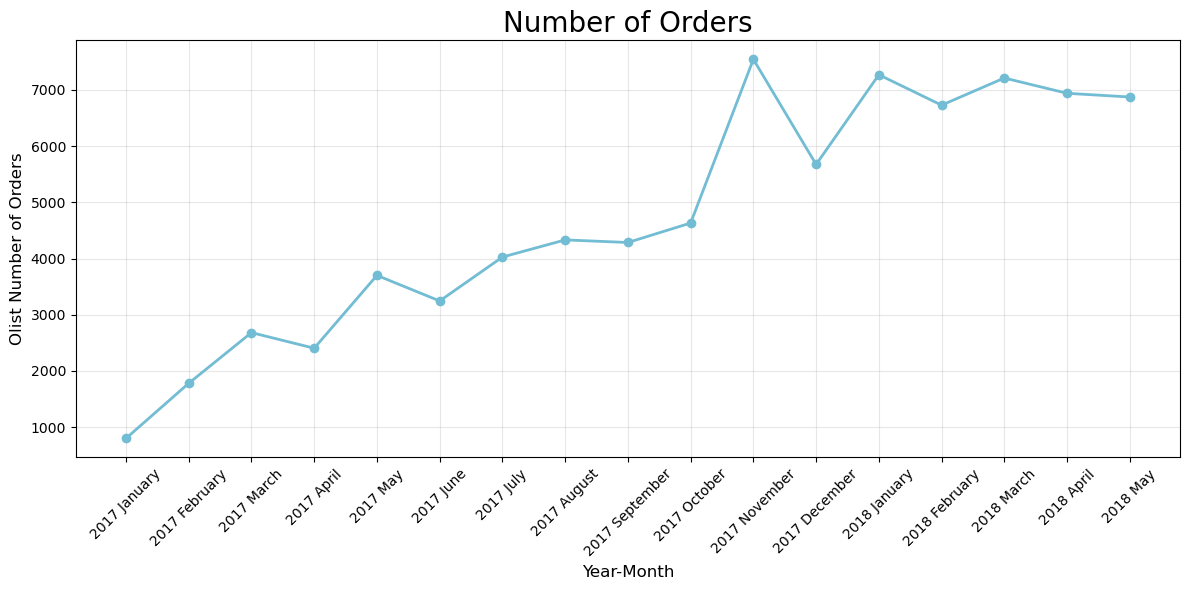

In [950]:
# Combine Year and Month into a single string for the x-axis
monthly_orders_df["Year-Month"] = monthly_orders_df["Year"].astype(str) + " " + monthly_orders_df["Month"]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_orders_df["Year-Month"],  # x-axis: combined Year and Month
    monthly_orders_df["order_count"],  # y-axis: order count
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Orders", loc="center", fontsize=20)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Olist Number of Orders", fontsize=12)
plt.grid(alpha=0.3)  # Optional: Add grid lines for clarity
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

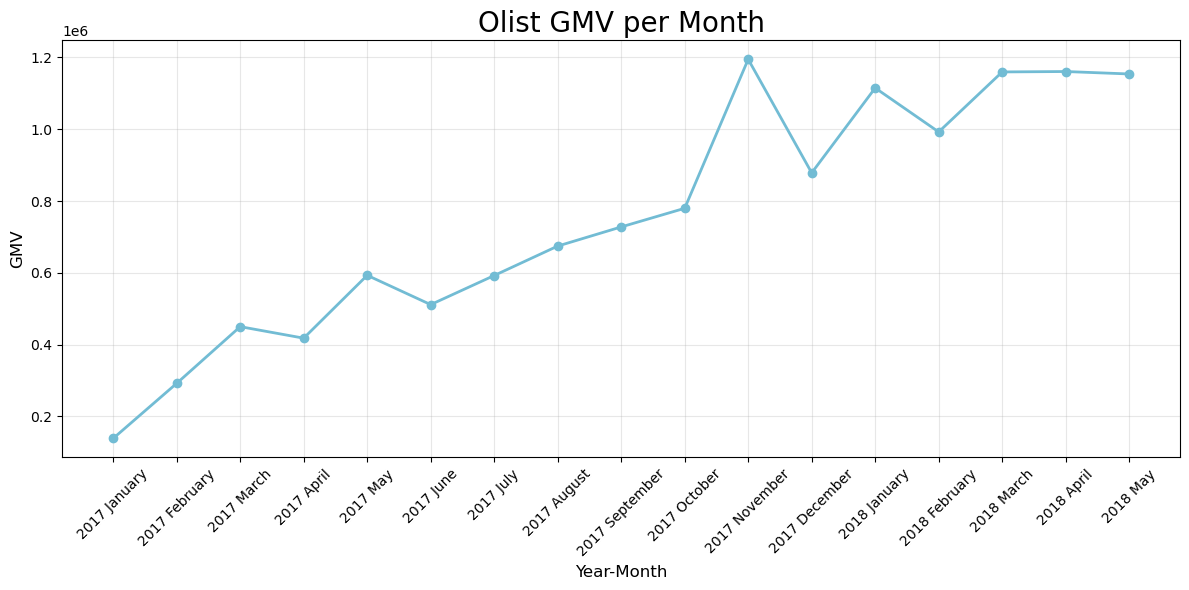

In [951]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_orders_df["Year-Month"],  # x-axis: combined Year and Month
    monthly_orders_df["GMV"],  # y-axis: order count
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Olist GMV per Month", loc="center", fontsize=20)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("GMV", fontsize=12)
plt.grid(alpha=0.3)  # Optional: Add grid lines for clarity
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Pertanyaan 2 : Kategori Produk apa yang paling banyak dan paling sedikit terjual di Olist?

In [952]:
products_product_translation_order_items_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,00066f42aeeb9f3007548bb9d3f33c38,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0,perfumery,f30149f4a8882a08895b6a242aa0d612,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59
1,00088930e925c41fd95ebfe695fd2655,automotivo,56.0,752.0,4.0,1225.0,55.0,10.0,26.0,auto,f5eda0ded77c1293b04c953138c8331d,1,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93
2,0009406fd7479715e4bef61dd91f2462,cama_mesa_banho,50.0,266.0,2.0,300.0,45.0,15.0,35.0,bed_bath_table,0bf736fd0fd5169d60de3699fcbcf986,1,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10
3,000b8f95fcb9e0096488278317764d19,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0,housewares,3aba44d8e554ab4bb8c09f6f78032ca8,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60
4,000b8f95fcb9e0096488278317764d19,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0,housewares,6f0dfb5b5398b271cc6bbd9ee263530e,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffdb2d0ec8d6a61f0a0a0db3f25b441,informatica_acessorios,47.0,501.0,5.0,150.0,16.0,4.0,13.0,computers_accessories,a8159270bc9cf7d54450e079ba6b7232,1,9f505651f4a6abe901a56cdc21508025,2018-04-09 05:35:27,29.99,18.23
112646,fffdb2d0ec8d6a61f0a0a0db3f25b441,informatica_acessorios,47.0,501.0,5.0,150.0,16.0,4.0,13.0,computers_accessories,beaf95465b542dea76df78b2fb86a97a,1,9f505651f4a6abe901a56cdc21508025,2018-04-25 10:30:35,34.99,18.23
112647,fffdb2d0ec8d6a61f0a0a0db3f25b441,informatica_acessorios,47.0,501.0,5.0,150.0,16.0,4.0,13.0,computers_accessories,d6c1ed12e8eeaa15e9d5c83c79598f85,1,9f505651f4a6abe901a56cdc21508025,2018-08-14 17:25:18,34.99,7.51
112648,fffdb2d0ec8d6a61f0a0a0db3f25b441,informatica_acessorios,47.0,501.0,5.0,150.0,16.0,4.0,13.0,computers_accessories,dd38c566a34ff9deb93ff05d7bd6d0aa,1,9f505651f4a6abe901a56cdc21508025,2018-05-07 17:53:01,34.99,7.39


In [953]:
orders_products_product_translation_order_items_df = pd.merge(
    left=orders_df,
    right=products_product_translation_order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_products_product_translation_order_items_df.to_csv("product_orders.csv", index=False)


In [954]:
sum_order_items_df = products_product_translation_order_items_df.groupby("product_category_name_english").order_id.nunique().sort_values(ascending=False).reset_index()

sum_order_items_df.rename(columns={
    "product_category_name_english": "product_category",
    "order_id": "jumlah_penjualan"
}, inplace=True)

sum_order_items_df

,product_category,jumlah_penjualan
0,bed_bath_table,9417
1,health_beauty,8836
2,sports_leisure,7720
3,computers_accessories,6689
4,furniture_decor,6449
...,...,...
66,arts_and_craftmanship,23
67,la_cuisine,13
68,cds_dvds_musicals,12
69,fashion_childrens_clothes,8


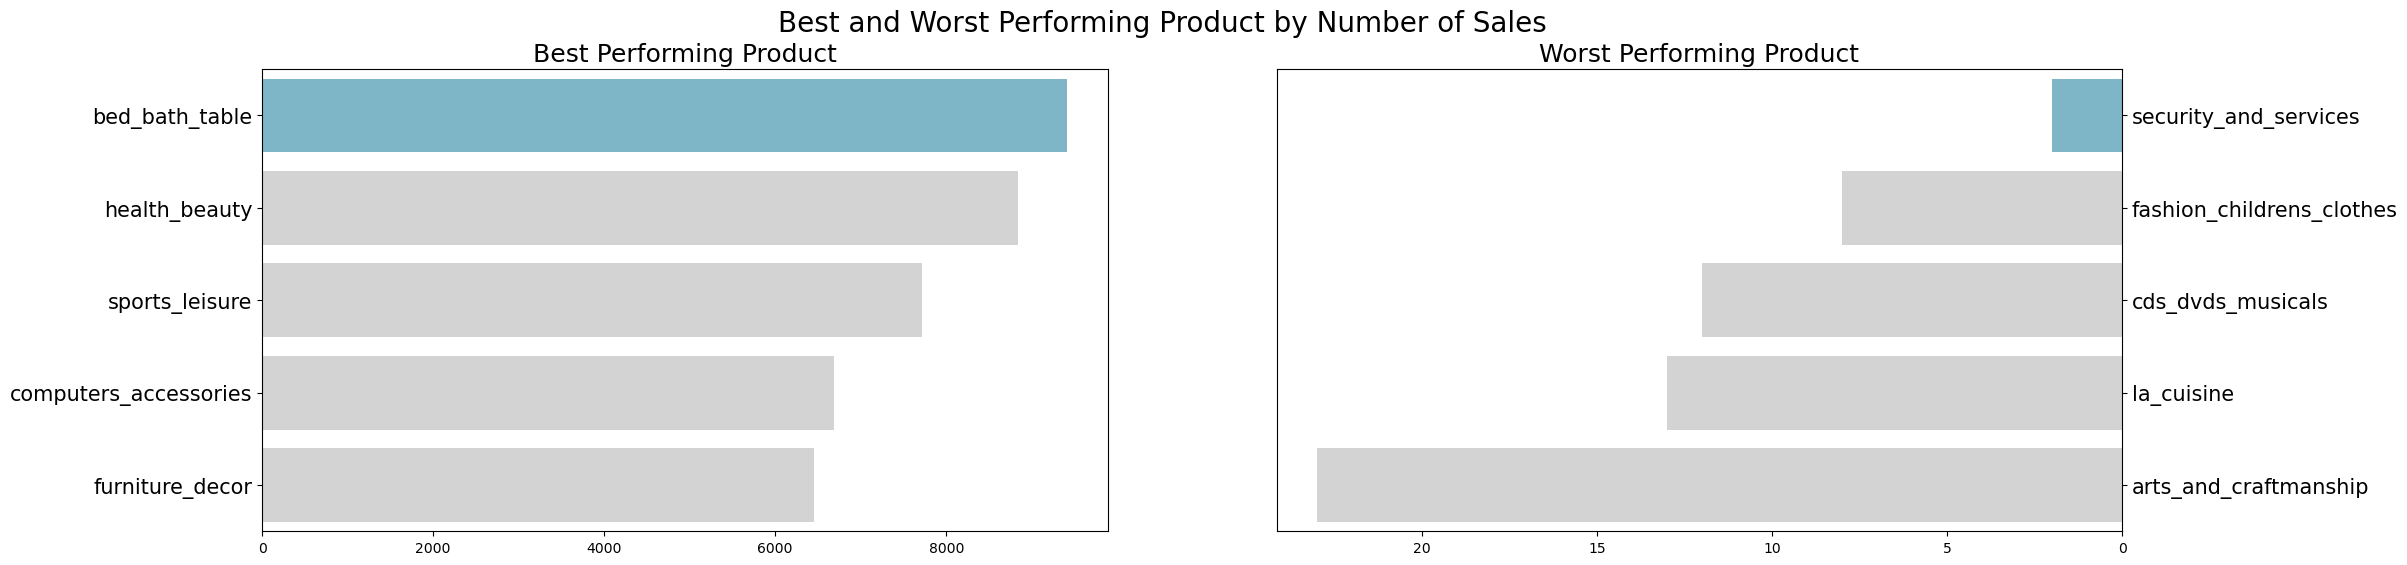

In [955]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="jumlah_penjualan", y="product_category", data=sum_order_items_df.head(5), palette=colors, hue="product_category", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="jumlah_penjualan", y="product_category", data=sum_order_items_df.sort_values(by="jumlah_penjualan", ascending=True).head(5), palette=colors, hue="product_category", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

## Pertanyaan 3 : Kategori Produk apa yang memiliki review baik dan paling buruk? 

In [956]:
orders_reviews_order_items_products_df = pd.merge(
    left=orders_df,
    right= reviews_order_items_products_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

orders_reviews_order_items_products_df.to_csv("review_orders.csv", index=False)

In [957]:
sum_order_reviews_df = reviews_order_items_products_df.groupby("product_category_name_english").review_score.mean().sort_values(ascending=False).reset_index()

sum_order_reviews_df.rename(columns={
    "product_category_name_english": "product_category",
    "review_score": "mean_score_review"
}, inplace=True)

sum_order_reviews_df

,product_category,mean_score_review
0,cds_dvds_musicals,4.642857
1,fashion_childrens_clothes,4.500000
2,books_general_interest,4.446266
3,costruction_tools_tools,4.444444
4,flowers,4.419355
...,...,...
66,fashion_male_clothing,3.641221
67,home_comfort_2,3.629630
68,office_furniture,3.493183
69,diapers_and_hygiene,3.256410


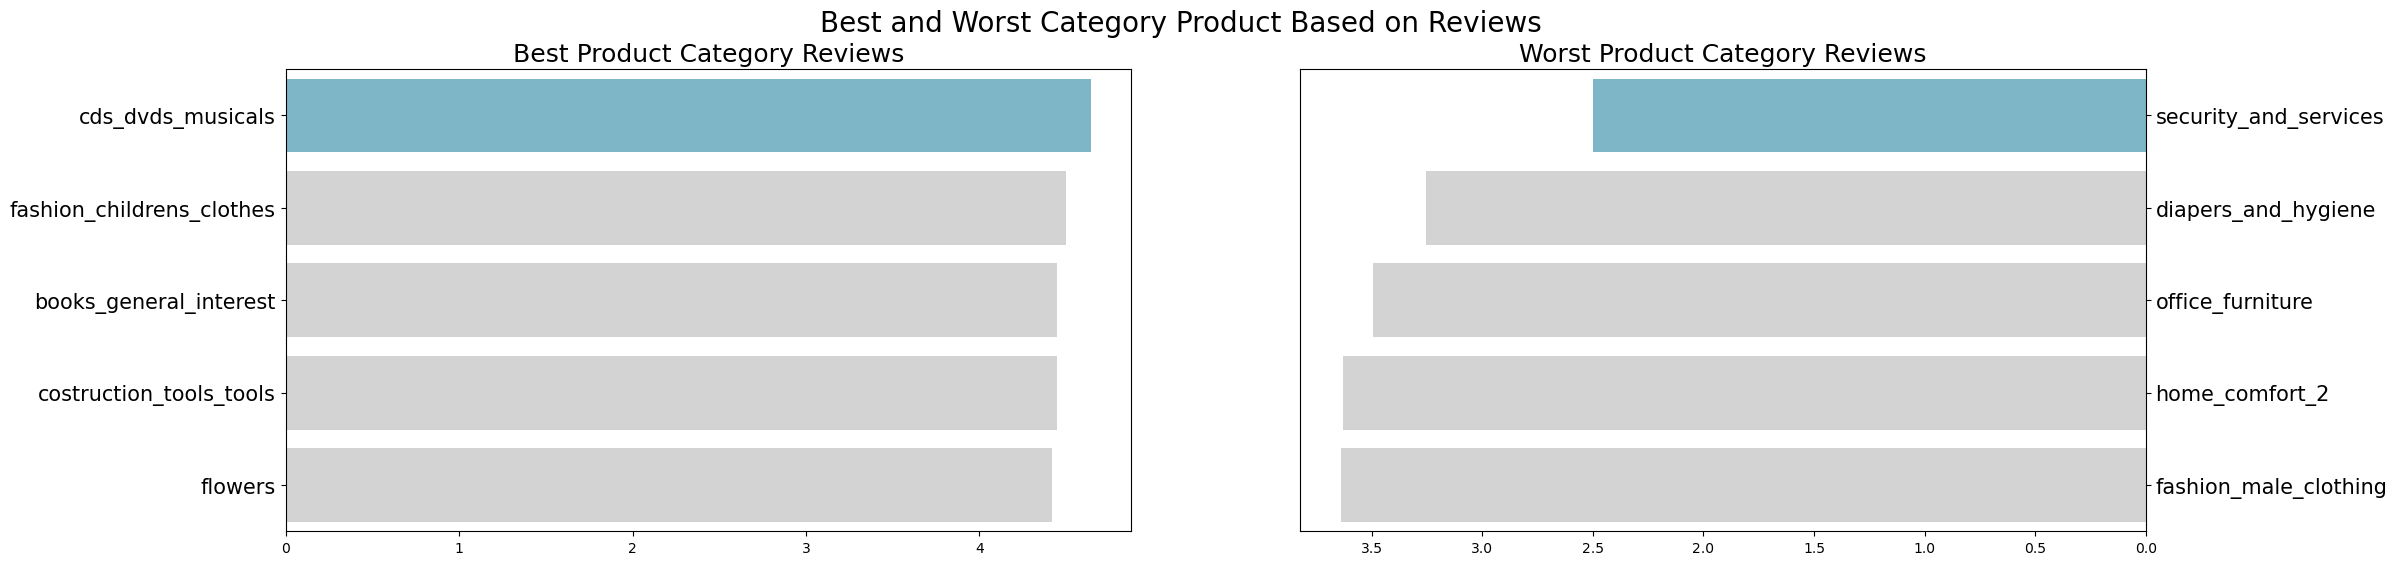

In [958]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="mean_score_review", y="product_category", data=sum_order_reviews_df.head(5), palette=colors, hue="product_category", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Product Category Reviews", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="mean_score_review", y="product_category", data=sum_order_reviews_df.sort_values(by="mean_score_review", ascending=True).head(5), palette=colors, hue="product_category", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Product Category Reviews", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Category Product Based on Reviews ", fontsize=20)
plt.show()

## Pertanyaan 4 : Bagaimana demografi konsumen yang kita miliki?

### Berdasarkan City

In [959]:
orders_customers_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approved_time,carrier_time,customer_time,eta_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.0,2.0,6.0,7.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,0.0,12.0,5.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.0,0.0,9.0,17.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.0,4.0,9.0,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0.0,1.0,2.0,9.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,0.0,1.0,7.0,10.0,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,Active
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0.0,1.0,21.0,1.0,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,Active
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0.0,1.0,24.0,6.0,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,Active
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0.0,4.0,13.0,20.0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,Active


In [960]:
bycity_df = orders_customers_df.groupby(by="customer_city").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
bycity_df.rename(columns={
    "customer_unique_id": "customer_count"
}, inplace=True)
bycity_df

,customer_city,customer_count
0,sao paulo,14984
1,rio de janeiro,6620
2,belo horizonte,2672
3,brasilia,2069
4,curitiba,1465
...,...,...
4114,ibertioga,1
4115,ibiajara,1
4116,ibiara,1
4117,ibicuitinga,1


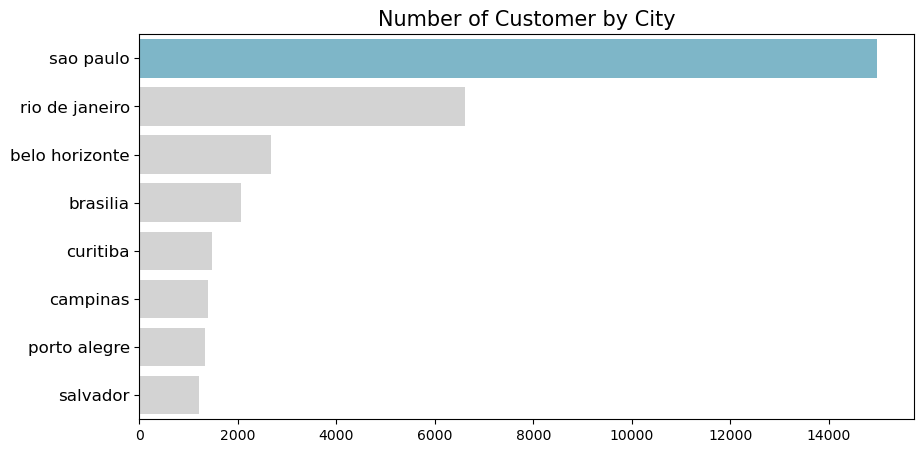

In [961]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="customer_city",
    data=bycity_df.head(8).sort_values(by="customer_count", ascending=False),
    palette=colors_ ,
    hue="customer_city"
)
plt.title("Number of Customer by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Berdasarkan State

In [962]:
bystate_df = orders_customers_df.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
bystate_df.rename(columns={
    "customer_unique_id": "customer_count"
}, inplace=True)
bystate_df.head(10)

,customer_state,customer_count
0,SP,40302
1,RJ,12384
2,MG,11259
3,RS,5277
4,PR,4882
5,SC,3534
6,BA,3277
7,DF,2075
8,ES,1964
9,GO,1952


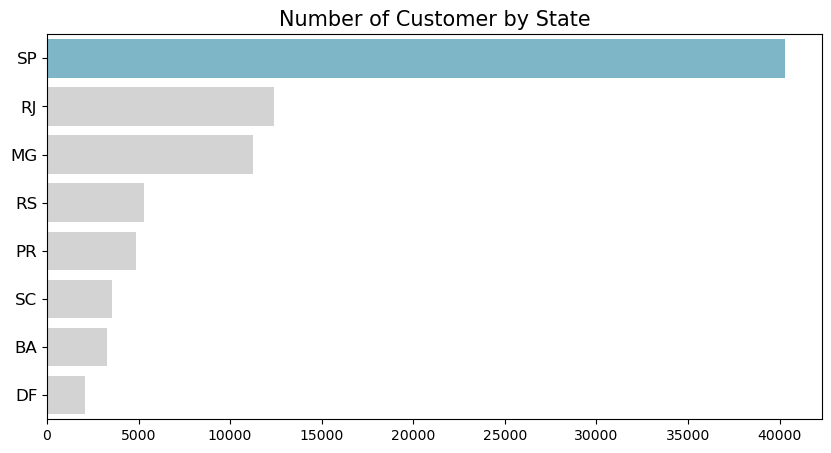

In [963]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="customer_state",
    data=bystate_df.head(8).sort_values(by="customer_count", ascending=False),
    palette=colors_ ,
    hue="customer_state"
)
plt.title("Number of Customer by State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [964]:
customer_geolocation_df = pd.merge(
    left=customers_df,
    right=geolocation_df,
    how="left",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
customer_geolocation_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409.0,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409.0,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409.0,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409.0,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409.0,-20.515413,-47.398194,franca,SP


In [965]:
gdf = geopandas.GeoDataFrame(
    customer_geolocation_df, geometry=geopandas.points_from_xy(customer_geolocation_df.geolocation_lng, customer_geolocation_df.geolocation_lat), crs="EPSG:4326"
)
gdf.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geometry
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409.0,-20.509897,-47.397866,franca,SP,POINT (-47.39787 -20.50990)
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409.0,-20.497396,-47.399241,franca,SP,POINT (-47.39924 -20.49740)
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409.0,-20.510459,-47.399553,franca,SP,POINT (-47.39955 -20.51046)
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409.0,-20.480940,-47.394161,franca,SP,POINT (-47.39416 -20.48094)
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409.0,-20.515413,-47.398194,franca,SP,POINT (-47.39819 -20.51541)


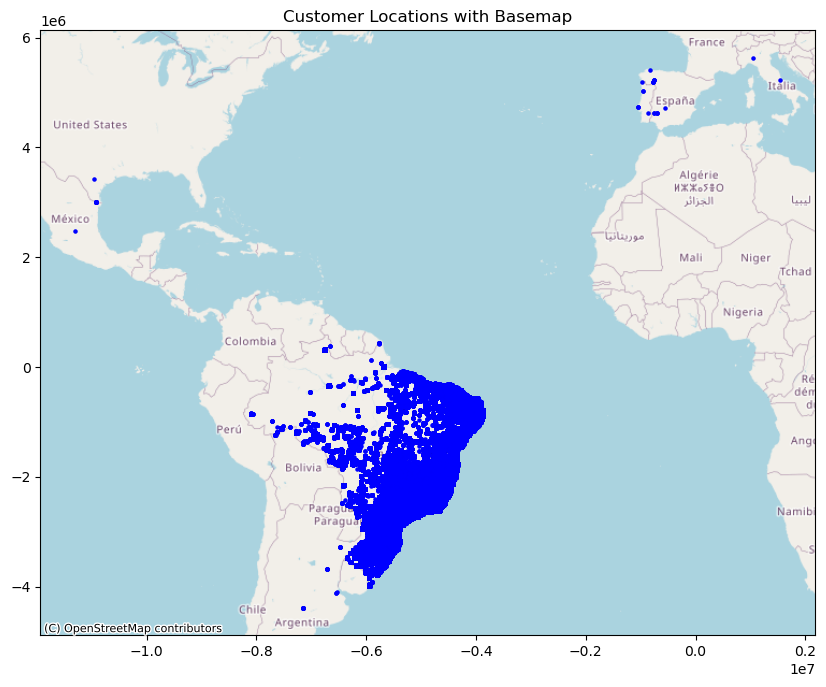

In [966]:
# Reproject to Web Mercator (EPSG:3857) for basemap compatibility
gdf = gdf.to_crs(epsg=3857)

# Plot the points with basemap
ax = gdf.plot(marker='o', color='blue', markersize=5, figsize=(10, 10))
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("Customer Locations with Basemap")
plt.show()

### RFM Analysis Konsumen

In [967]:
orders_customers_payment_df = pd.merge(
    left=orders_customers_df,
    right=order_payments_df,
    how="outer",
    left_on="order_id",
    right_on="order_id"
)

orders_customers_payment_geolocation_df = pd.merge(
    left=orders_customers_payment_df,
    right=geolocation_df,
    how="left",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
orders_customers_payment_geolocation_df.to_csv("customer_orders.csv", index=False)

In [968]:
rfm_df = orders_customers_payment_df[orders_customers_payment_df["order_status"] == "delivered"].groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max", #mengambil tanggal order terakhir
    "order_id": "nunique",
    "payment_value": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,196.89


In [969]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()
     

,customer_id,max_order_timestamp,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,141.90,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,27.19,163
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,86.22,586
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,43.62,370
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,196.89,337


In [970]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,163
2,0000f46a3911fa3c0805444483337064,1,86.22,586
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,370
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,337


In [971]:
rfm_df.describe()

,frequency,monetary,recency
count,93358.000000,93358.000000,93358.000000
mean,1.033420,165.197003,286.478877
std,0.209097,226.314012,152.595054
min,1.000000,0.000000,49.000000
25%,1.000000,63.052500,163.000000
50%,1.000000,107.780000,267.000000
75%,1.000000,182.557500,395.000000
max,15.000000,13664.080000,762.000000


In [972]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
33812,5c58de6fb80e93396e2f35642666b693,1,510.96,49
46739,7febafa06d9d8f232a900a2937f04338,1,61.29,49
4587,0c6d7218d5f3fa14514fd29865269993,1,178.25,49
13433,24ac2b4327e25baf39f2119e4228976a,1,93.75,49
66821,b701bebbdf478f5500348f03aff62121,1,33.23,49


In [973]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
51431,8d50f5eadf50201ccdcedfb9e2ac8455,15,879.27,58
22779,3e43e6105506432c953e165fb2acf44c,9,1172.66,232
36706,6469f99c1f9dfae7733b25662e7f1782,7,758.83,111
73921,ca77025e7201e3b30c44b472ff346268,7,1122.72,138
10060,1b6c7548a2a1f9037c1fd3ddfed95f33,7,959.01,245


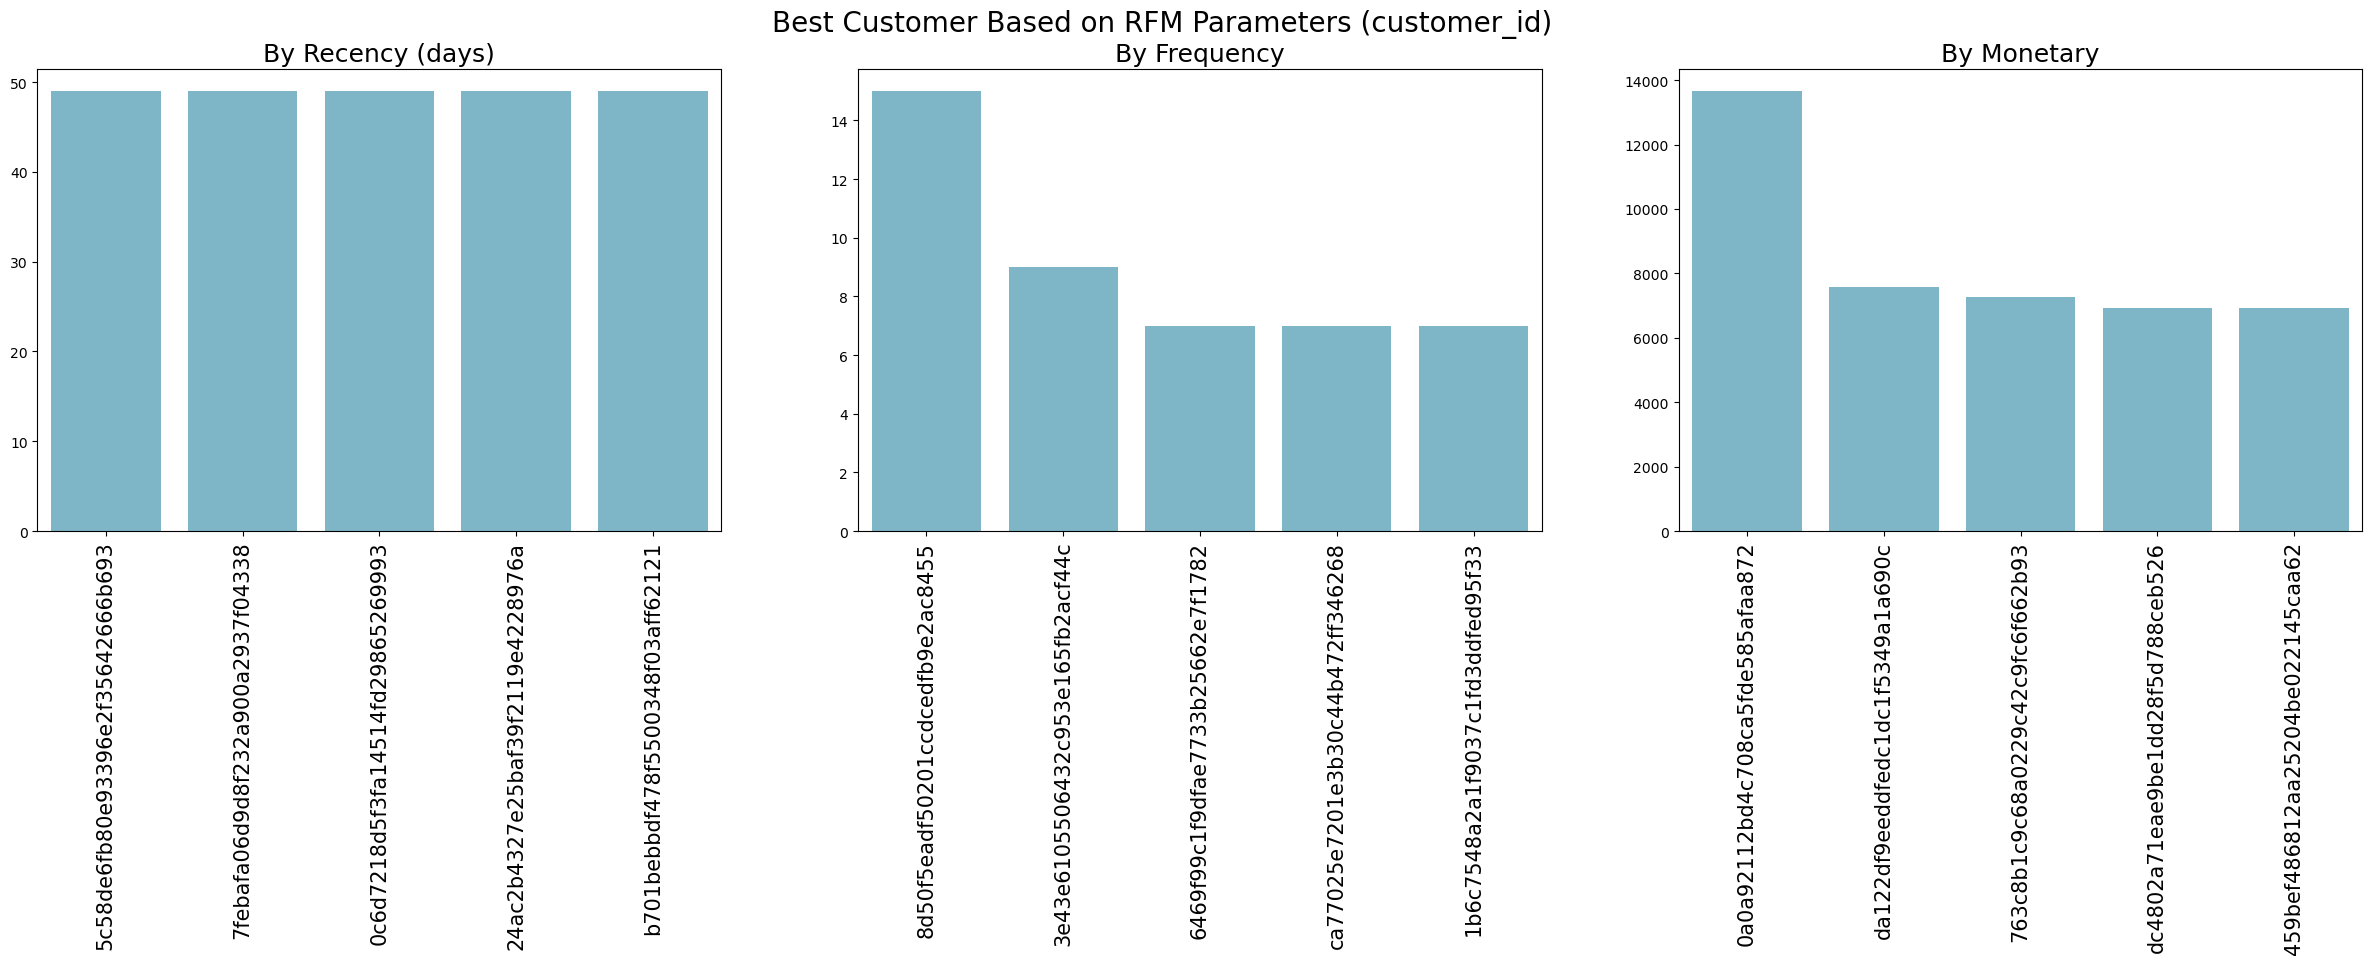

In [974]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, hue="customer_id", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', rotation=90,labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, hue="customer_id", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', rotation=90,labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, hue="customer_id", ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', rotation=90,labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Pertanyaan 5 : Bagaimana demografi penjual yang kita miliki?

### Berdasarkan City

In [975]:
orders_order_items_sellers_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approved_time,carrier_time,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.0,2.0,...,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,0.0,...,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570.0,belo horizonte,SP,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.0,0.0,...,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840.0,guariba,SP,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.0,4.0,...,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,31842.0,belo horizonte,MG,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0.0,1.0,...,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,8752.0,mogi das cruzes,SP,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0.0,1.0,...,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,17602.0,tupa,SP,Active
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0.0,1.0,...,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,8290.0,sao paulo,SP,Active
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0.0,4.0,...,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,37175.0,ilicinea,MG,Active
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0.0,4.0,...,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,37175.0,ilicinea,MG,Active


In [976]:
bycity_df = orders_order_items_sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).reset_index()
bycity_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)
bycity_df

,seller_city,seller_count
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
...,...,...
606,ivoti,1
607,itirapina,1
608,itau de minas,1
609,itapui,1


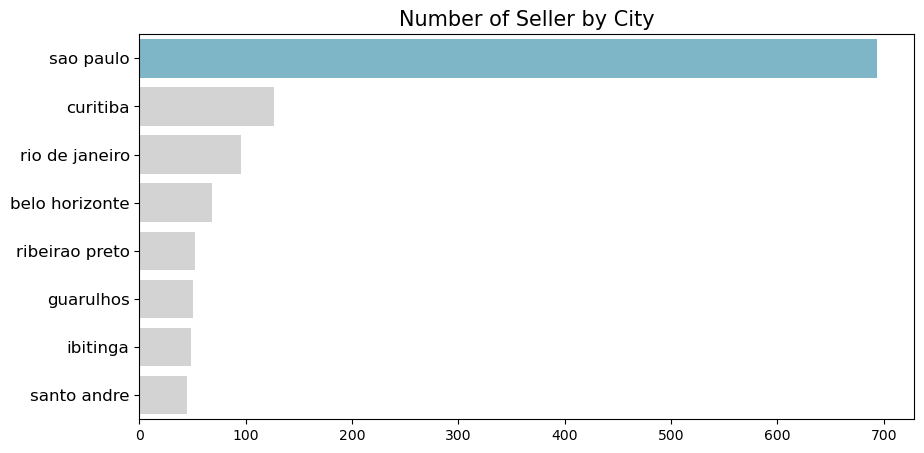

In [977]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="seller_count", 
    y="seller_city",
    data=bycity_df.head(8).sort_values(by="seller_count", ascending=False),
    palette=colors_ ,
    hue="seller_city"
)
plt.title("Number of Seller by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Berdasarkan State

In [978]:
bystate_df = orders_order_items_sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).reset_index()
bystate_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)
bystate_df.head(10)

,seller_state,seller_count
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171
5,RS,129
6,GO,40
7,DF,30
8,ES,23
9,BA,19


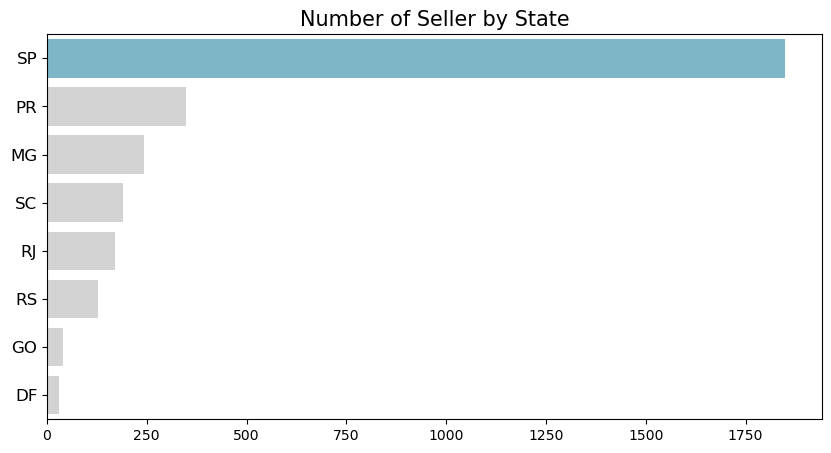

In [979]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="seller_count", 
    y="seller_state",
    data=bystate_df.head(8).sort_values(by="seller_count", ascending=False),
    palette=colors_ ,
    hue="seller_state"
)
plt.title("Number of Seller by State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [980]:
sellers_geolocation_df = pd.merge(
    left=sellers_df,
    right=geolocation_df,
    how="left",
    left_on="seller_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
sellers_geolocation_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,status,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,Active,13023.0,-22.898536,-47.063125,campinas,SP
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,Active,13023.0,-22.895499,-47.061944,campinas,SP
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,Active,13023.0,-22.891740,-47.060820,campinas,SP
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,Active,13023.0,-22.895762,-47.066144,campinas,SP
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,Active,13023.0,-22.896154,-47.062431,campinas,SP


In [981]:
gdf = geopandas.GeoDataFrame(
    sellers_geolocation_df, geometry=geopandas.points_from_xy(sellers_geolocation_df.geolocation_lng, sellers_geolocation_df.geolocation_lat), crs="EPSG:4326"
)
gdf.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,status,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geometry
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,Active,13023.0,-22.898536,-47.063125,campinas,SP,POINT (-47.06313 -22.89854)
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,Active,13023.0,-22.895499,-47.061944,campinas,SP,POINT (-47.06194 -22.89550)
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,Active,13023.0,-22.891740,-47.060820,campinas,SP,POINT (-47.06082 -22.89174)
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,Active,13023.0,-22.895762,-47.066144,campinas,SP,POINT (-47.06614 -22.89576)
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,Active,13023.0,-22.896154,-47.062431,campinas,SP,POINT (-47.06243 -22.89615)


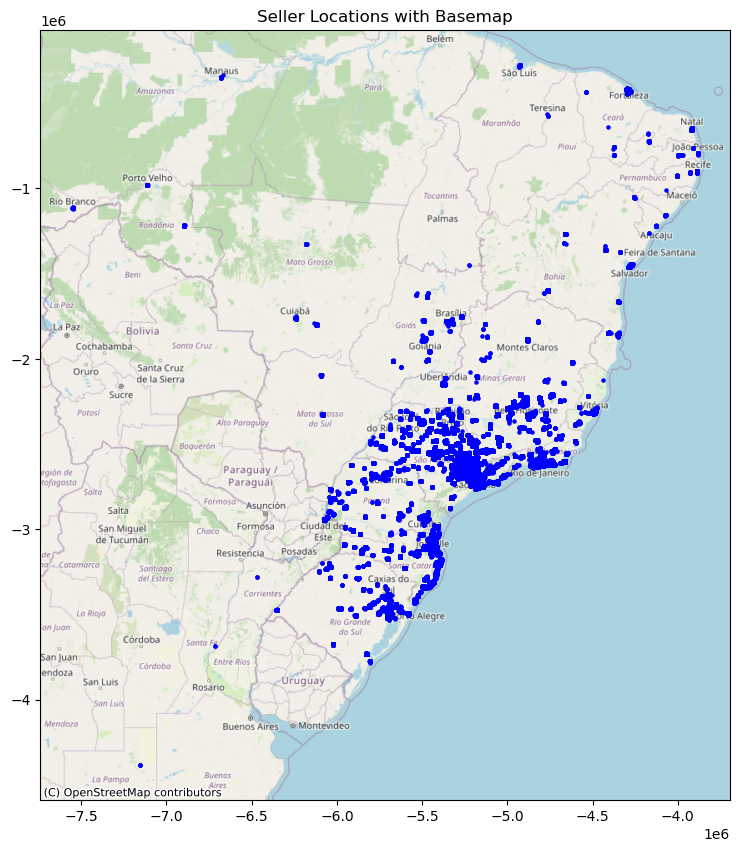

In [982]:
# Reproject to Web Mercator (EPSG:3857) for basemap compatibility
gdf = gdf.to_crs(epsg=3857)

# Plot the points with basemap
ax = gdf.plot(marker='o', color='blue', markersize=5, figsize=(10, 10))
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("Seller Locations with Basemap")
plt.show()

### RFM Analysis Seller

In [983]:
orders_items_sellers_payment_df = pd.merge(
    left=orders_order_items_sellers_df,
    right=order_payments_df,
    how="outer",
    left_on="order_id",
    right_on="order_id"
)

orders_items_sellers_payment_geolocation_df = pd.merge(
    left= orders_items_sellers_payment_df,
    right=geolocation_df,
    how="left",
    left_on="seller_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
orders_items_sellers_payment_geolocation_df.to_csv("seller_orders.csv", index=False)


In [984]:
rfm_df = orders_items_sellers_payment_df[orders_items_sellers_payment_df["order_status"] == "delivered"].groupby(by="seller_id", as_index=False).agg({
    "order_purchase_timestamp": "max", #mengambil tanggal order terakhir
    "order_id": "nunique",
    "payment_value": "sum"
})
rfm_df.columns = ["seller_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,seller_id,max_order_timestamp,frequency,monetary
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-18 08:16:34,3,2748.06
1,001cca7ae9ae17fb1caed9dfb1094831,2018-07-12 21:38:26,195,47557.95
2,002100f778ceb8431b7a1020ff7ab48f,2018-04-12 12:58:23,50,2412.64
3,003554e2dce176b5555353e4f3555ac8,2017-12-15 06:52:25,1,139.38
4,004c9cd9d87a3c30c522c48c4fc07416,2018-05-03 11:13:38,156,27640.43


In [985]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()
     

,seller_id,max_order_timestamp,frequency,monetary,recency
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-18,3,2748.06,364
1,001cca7ae9ae17fb1caed9dfb1094831,2018-07-12,195,47557.95,97
2,002100f778ceb8431b7a1020ff7ab48f,2018-04-12,50,2412.64,188
3,003554e2dce176b5555353e4f3555ac8,2017-12-15,1,139.38,306
4,004c9cd9d87a3c30c522c48c4fc07416,2018-05-03,156,27640.43,167


In [986]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,seller_id,frequency,monetary,recency
0,0015a82c2db000af6aaaf3ae2ecb0532,3,2748.06,364
1,001cca7ae9ae17fb1caed9dfb1094831,195,47557.95,97
2,002100f778ceb8431b7a1020ff7ab48f,50,2412.64,188
3,003554e2dce176b5555353e4f3555ac8,1,139.38,306
4,004c9cd9d87a3c30c522c48c4fc07416,156,27640.43,167


In [987]:
rfm_df.describe()

,frequency,monetary,recency
count,2970.000000,2970.000000,2970.000000
mean,32.935690,6658.639879,178.729630
std,105.407111,21669.564634,163.491502
min,1.000000,15.220000,49.000000
25%,2.000000,328.205000,62.000000
50%,7.000000,1302.500000,91.000000
75%,22.000000,5059.900000,254.750000
max,1819.000000,505437.160000,744.000000


In [988]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,seller_id,frequency,monetary,recency
1257,6b90f847357d8981edd79a1eb1bf0acb,45,4283.55,49
148,0be8ff43f22e456b4e0371b2245e4d01,156,16874.91,49
1219,67bf6941ba2f1fa1d02c375766bc3e53,15,9971.48,49
2313,c70c1b0d8ca86052f45a432a38b73958,260,64191.12,49
1130,5f2684dab12e59f83bef73ae57724e45,67,11572.20,49


In [989]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,seller_id,frequency,monetary,recency
1190,6560211a19b47992c3666cc44a7e94c0,1819,176097.10,49
858,4a3ca9315b744ce9f8e9374361493884,1772,295830.76,51
2388,cc419e0650a3c5ba77189a1882b7556a,1651,137132.70,51
358,1f50f920176fa81dab994f9023523100,1399,289861.38,53
2543,da8622b14eb17ae2831f4ac5b9dab84a,1311,271733.78,50


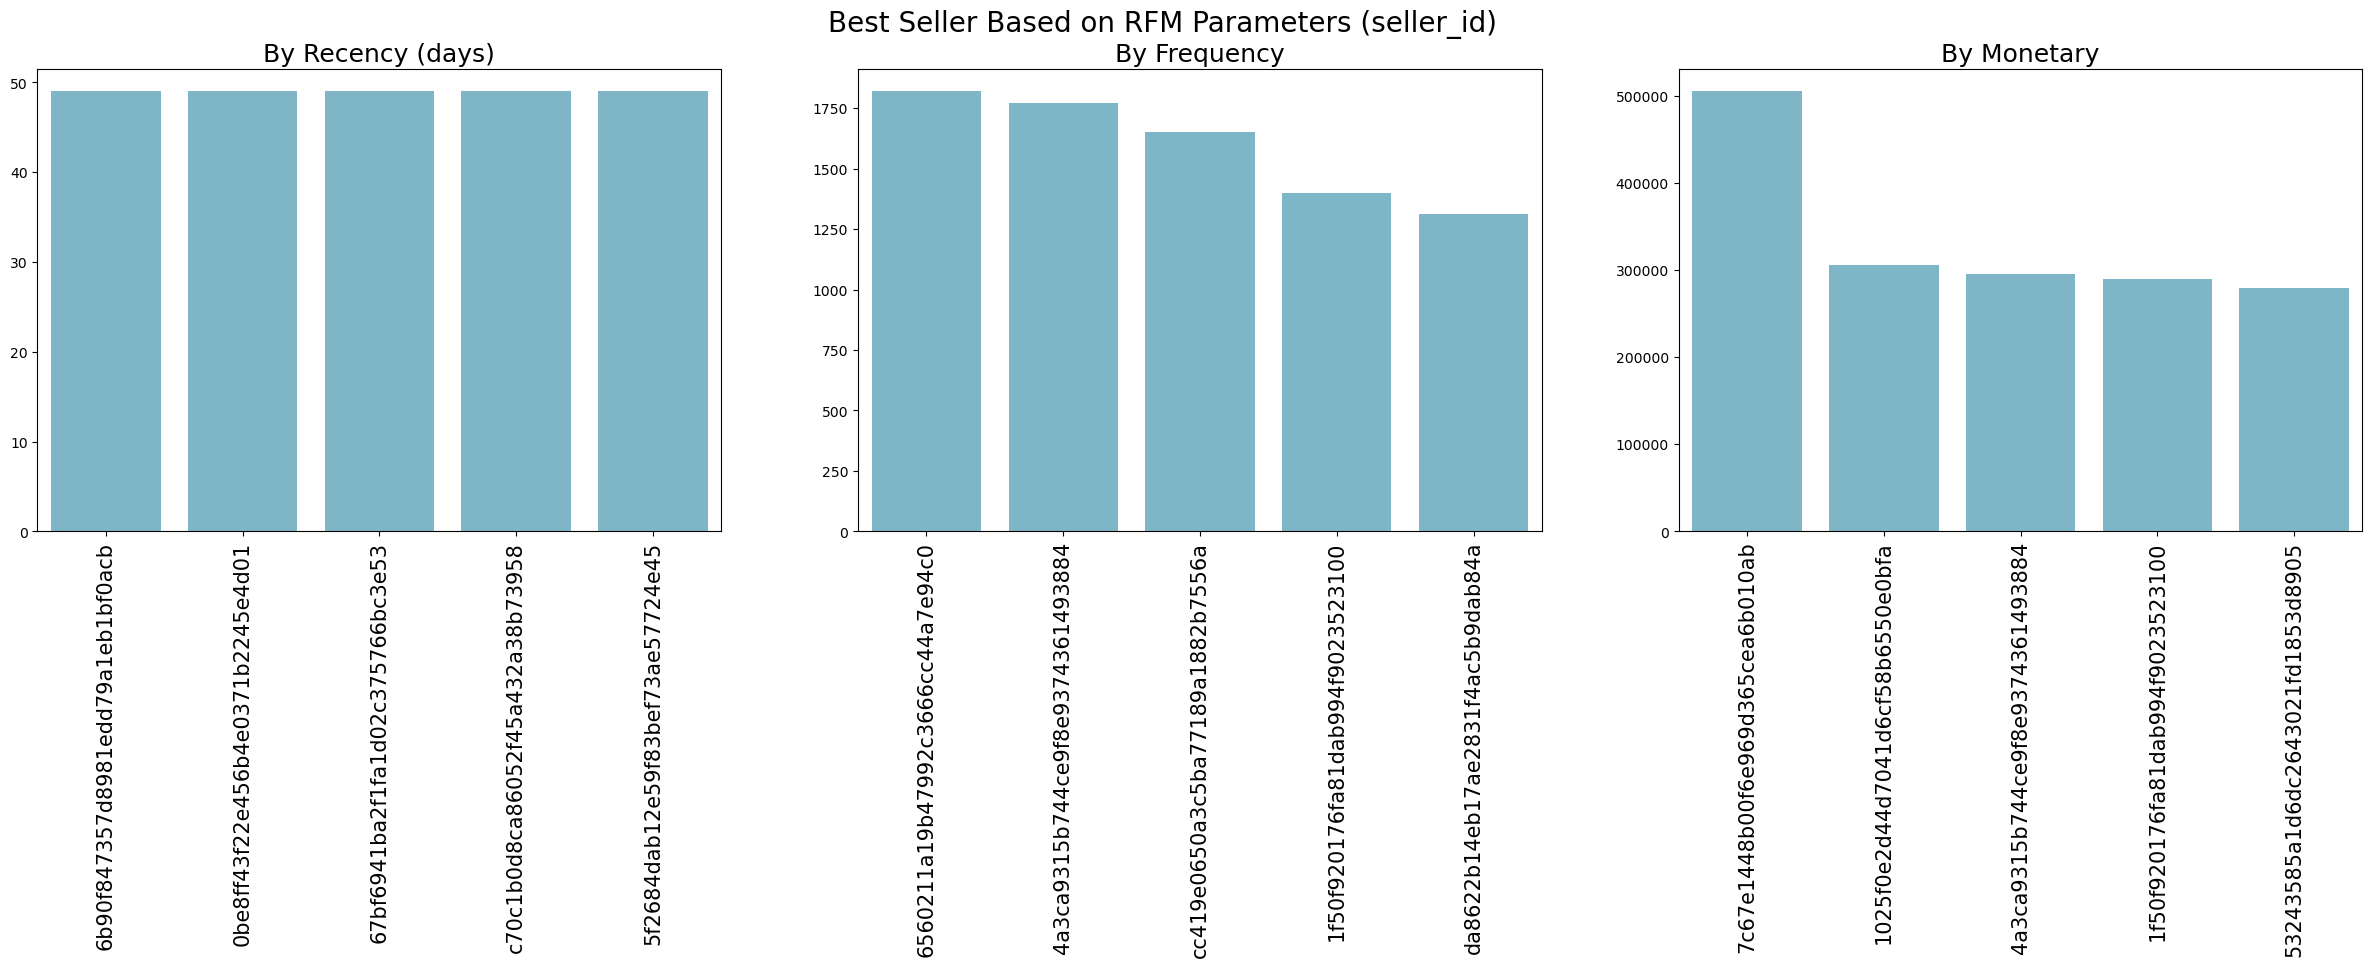

In [990]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="seller_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, hue="seller_id", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', rotation=90,labelsize=15)

sns.barplot(y="frequency", x="seller_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, hue="seller_id", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', rotation=90,labelsize=15)

sns.barplot(y="monetary", x="seller_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, hue="seller_id", ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', rotation=90,labelsize=15)

plt.suptitle("Best Seller Based on RFM Parameters (seller_id)", fontsize=20)
plt.show()

# Conclusion

## Pertanyaan 1 : Bagaimana GMV penjualan Olist setiap bulannya? (01/01/2017 - 06/01/2018)
- Pada bulan Januari hingga bulan November 2017 order maupun GMV dari Olist terus meningkat dari 800 order dengan GMV 138488 Real hingga 7544 order dengan GMV 1194882 Real dimana November 2017 merupakan pencapaian tertinggi Olist.
- Pada bulan Desember 2017 terjadi penurunan paling rendah dimana dari 7544 order dengan GMV 1194882 Real ke 5673(-24%) order dengan GMV 878401(-26%)
- Pada bulan January hingga Juni 2018 Order dan GMV Olist cenderung stabil dimana rentang per bulannya order yang didapat ada pada range 6873-7269 order dan 992463-1160785 Real untuk GMV

## Pertanyaan 2 : Kategori Produk apa yang paling banyak dan paling sedikit terjual di Olist?
- Kategori produk dengan penjualan terbaik adalah bed_bath_table dengan 9417 produk terjual sedangkan yang terburuk adalah kategori security_and_services dimana hanya 2 produk terjual.

## Pertanyaan 3 : Kategori Produk apa yang memiliki review baik dan paling buruk? 
- Kategori produk dengan review terbaik adalah cds_dvds_musicals dengan nilai rata-rata 4.6 sedangkan yang terburuk adalah kategori security_and_services dengan nilai rata-rata 2.5

## Pertanyaan 4 : Bagaimana demografi konsumen yang kita miliki?
- Konsumen Olist kebanyakan berasal dari kota sao paulo yaitu berjumlah 14984 dan negara dengan kode SP 40302
- Rata-rata konsumen Olist hanya berbelanja 1x bahkan >75% konsumen yang pernah berbelanja hanya melakukan pembelian 1x dimana mengindikasikan bahwa Churn rate dari konsumen sangat tinggi. 
- Rata-rata konsumen Olist menghabiskan 165 Real
- Rata-rata konsumen Olist berbelanja terakhir kali 286 hari yang lalu dimana sudah cukup lama. 

## Pertanyaan 5 : Bagaimana demografi penjual yang kita miliki?
- Penjual Olist kebanyakan berasal dari kota sao paulo yaitu berjumlah 694 dan negara dengan kode SP 1849
- Rata-rata penjual Olist mendapatkan 32 order dan median 7 order
- Rata-rata penjual Olist menghasilkan GMV sebesar 6658
- Rata-rata penjual Olist mendapatkan order terakhir kali 178 hari yang lalu dimana sudah cukup lama dimana mengindikasikan bahwa hanya penjual-penjual tertentu yang memiliki order cukup baik. 